In [3]:
# PROJET6_DATA_ANALYSIS_OCR
# Changement du repertoire: A ne plus changer.
import os
os.chdir('C://Users//yebel//Desktop//OPENCLASSROOMS//FORMATION_DATA_ANALYST//OPENCLASSROOMS_COURS//PROJET6//P6_YEBEL_SAMUEL')

In [4]:
# 0- IMPORTATIONS DES BIBLIOTHEQUES NECESSAIRES POUR L'ANALYSE DES DONNEES.

%matplotlib inline
import pandas as pd
import numpy as np
import numpy, math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker #y axis format
import matplotlib.ticker as plticker
import matplotlib.lines as mlines #légende
import seaborn as sns
sns.set(color_codes=True)
from datetime import datetime
import scipy.stats as stats
#from scipy.stats import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
import pingouin as pg 

In [5]:
# 1-IMPORTATION DES FICHIERS DE DONNEES: customers.csv; products.csv; transactions.csv. panier.csv

produits_invendus        =  pd.read_csv('export/produits_invendus.csv')
clients_sans_achat       =  pd.read_csv('export/clients_sans_achat.csv')
transactions             =  pd.read_csv('export/transactions.csv', parse_dates=['t_date'])
panier                   =  pd.read_csv('export/panier.csv', parse_dates=['t_date_achat'], converters={'duree_session': pd.to_timedelta}, dtype={'year_month': object})
transactions['p_cat']    = transactions['p_cat'].astype(np.int64)

In [6]:
# 2. MISSION 1: DEMANDE D'ANTOINE- ANALYSE DES DIFFERENTS INDICATEURS DE VENTE.

# 2-1 CHIFFRE D'AFFAIRES ET SON EVOLUTION DANS LE TEMPS.

# 2-1-1 LE CHIFFRE D'AFFAIRES (CA) TOTAL REALISE SUR LA PERIODE ETUDIEE:MARS-2021 A FEVRIER-2023.

CA           =    transactions.p_price.sum()

Vtes         =    transactions.p_price.count()

print("Le Chiffre d'Affaire (CA) Total Réalisé sur la Période Etudiée est {:.2f}€".format(CA))

print("Le Volume de ventes (Vtes) Total Réalisé sur la Période Etudiée est {:.0f}".format(Vtes))

Le Chiffre d'Affaire (CA) Total Réalisé sur la Période Etudiée est 11856009.40€
Le Volume de ventes (Vtes) Total Réalisé sur la Période Etudiée est 679332


In [7]:
# 2-1-2 LA PERIODE DES TRANSACTIONS ETUDIEE.

dates = transactions.t_date.sort_values().values

print(f'Transactions de {dates[0]:} à {dates[-1]}')

Transactions de 2021-03-01T00:01:07.843138000 à 2023-02-28T23:58:30.792755000


In [8]:
# 2-2 EVOLUTION CHRONOLOGIQUE DU CHIFFRE D'AFFAIRES ET DU VOLUME DES VENTES. : VUE GLOBALE.

df = transactions[['t_date', 'p_price']]

df = df.sort_values('t_date').reset_index()

df['CA'] = np.cumsum(df.p_price)

df['Volume des Ventes'] = pd.Series(range(len(df))) + 1

# 2-2-1 VISUALISATION DE df.

df

,index,t_date,p_price,CA,Volume des Ventes
0,191139,2021-03-01 00:01:07.843138,11.99,1.199000e+01,1
1,2269,2021-03-01 00:02:26.047414,19.37,3.136000e+01,2
2,441509,2021-03-01 00:02:38.311413,4.50,3.586000e+01,3
3,446670,2021-03-01 00:04:54.559692,6.55,4.241000e+01,4
4,67108,2021-03-01 00:05:18.801198,16.49,5.890000e+01,5
...,...,...,...,...,...
679327,510204,2023-02-28 23:49:03.148402,21.92,1.185592e+07,679328
679328,271337,2023-02-28 23:51:29.318531,48.99,1.185597e+07,679329
679329,225071,2023-02-28 23:53:18.929676,26.99,1.185600e+07,679330
679330,3230,2023-02-28 23:58:00.107815,8.99,1.185600e+07,679331


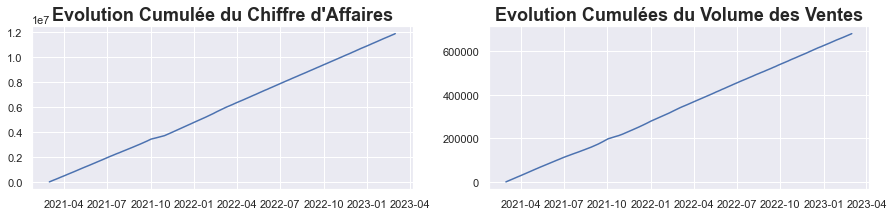

In [9]:
# 2-2-2 REPRESENTATION GRAPHIQUE DU CA ET DU VOLUME DE VENTES CUMULES.

plt.figure(figsize=(15,3))

plt.subplot(1,2,1)

plt.plot(df['t_date'], df['CA'], color='b')

plt.title("Evolution Cumulée du Chiffre d'Affaires", fontsize= 18, fontweight="bold")

plt.subplot(1,2,2)

plt.plot(df['t_date'], df['Volume des Ventes'], color='b')

plt.title('Evolution Cumulées du Volume des Ventes', fontsize= 18, fontweight="bold")

plt.savefig('graph/1- Evol_Cum_CA_Vtes.png')

plt.show()

In [10]:
# 2-3 DETERMINONS LE CHIFFRE D'AFFAIRES (CA) PAR MOIS.

ca=transactions.groupby(['t_year', 't_month']).agg({'p_price': np.sum}).rename(columns={'p_price': 'chiffre d\'affaires'})

display(ca.style.format({'chiffre d\'affaires': "{:.2f}"}))

In [11]:
# 2-3-1 INFORMATION SUR LE CA.

ca.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 24 entries, (2021.0, 3.0) to (2023.0, 2.0)
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chiffre d'affaires  24 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


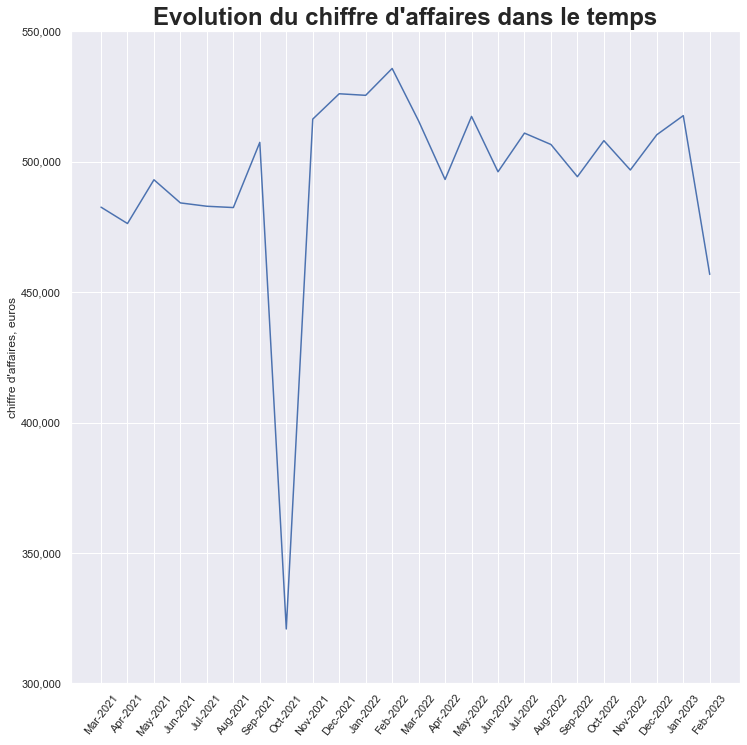

In [12]:
# 2-3-2 REPRESENTATION GRAPHIQUE DE L'EVOLUTION CHRONOLOGIQUE DU CHIFFRE D'AFFAIRES (CA). 

fig=plt.figure(figsize=(12,12))

axes = plt.gca()

axes.set_ylim([300000,550000])

axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.plot(range(len(ca.index)), ca.values)

plt.xticks(range(len(ca.index)), pd.date_range('2021-03-01','2023-02-01', freq='MS').strftime("%b-%Y").tolist(), rotation=52)

plt.ylabel('chiffre d\'affaires, euros')

plt.title('Evolution du chiffre d\'affaires dans le temps', fontsize= 24, fontweight="bold")


plt.savefig('graph/2- Evol_Msl_CA.png')

plt.show()

In [13]:
# 2-4 DETERMINONS LE NOMBRE DE VENTES (CA) PAR MOIS.

vtes=transactions.groupby(['t_year', 't_month']).agg({'p_price': 'count'}).rename(columns={'p_price': 'nombre de ventes'})

display(vtes.style.format({'nombre de ventes': "{:.2f}"}))

In [14]:
# 2-4-1 INFORMATION SUR LE NOMBRE DE VENTES.

vtes.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 24 entries, (2021.0, 3.0) to (2023.0, 2.0)
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   nombre de ventes  24 non-null     int64
dtypes: int64(1)
memory usage: 1.0 KB


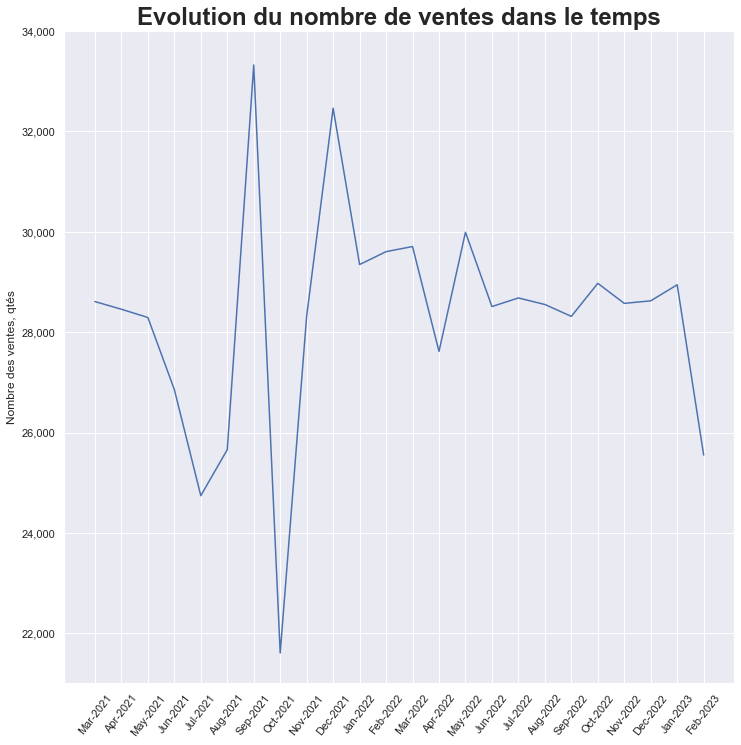

In [15]:
# 2-4-2 REPRESENTATION GRAPHIQUE DE L'EVOLUTION CHRONOLOGIQUE DU VOLUME DE VENTES (VTE). Voir Portfolio-main

fig=plt.figure(figsize=(12,12))

axes = plt.gca()

axes.set_ylim([21000,34000])

axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.plot(range(len(vtes.index)), vtes.values)

plt.xticks(range(len(vtes.index)), pd.date_range('2021-03-01','2023-02-01', freq='MS').strftime("%b-%Y").tolist(), rotation=52)

plt.ylabel('Nombre des ventes, qtés')

plt.title('Evolution du nombre de ventes dans le temps', fontsize= 24, fontweight="bold")

plt.savefig('graph/3- Evol_Msl_Vtes.png')

plt.show()

In [16]:
# 2-5 ANALYSE DES VENTES PAR MOIS.

resume_data = [0.000000003+transactions.p_price.sum(), len(transactions), len(panier), panier.montant_panier.mean()]

resume_data = pd.DataFrame(resume_data, index=["chiffre_affaires","nombre_produits_vendus","nombre_commandes","panier_moyen"], \
                          
                           columns=["donnees_non_corrigées"])

resume_data

,donnees_non_corrigées
chiffre_affaires,1.185601e+07
nombre_produits_vendus,6.793320e+05
nombre_commandes,3.423150e+05
panier_moyen,3.463479e+01


In [17]:
# 2-5-1 REGROUPEMENT DU NOMBRE DES VENTES PAR MOIS. 

analyse_mois = panier.groupby("year_month")[["montant_panier","nombre_produits_panier"]].sum()

analyse_mois.columns = ["chiffre_affaires","nombre_produits_vendus"]

analyse_mois["prix_moyen_produit"] = analyse_mois.chiffre_affaires / \
                                                analyse_mois.nombre_produits_vendus

In [18]:
# 2-5-2 DETERMINONS LE NOMBRE DES VENTES, LE PANIER MOYEN ET LE NOMBRE MOYEN DES PRODUITS.

analyse_mois["nombre_ventes"] = panier.groupby("year_month")["t_sess_id"].count()

analyse_mois["panier_moyen"] = analyse_mois.chiffre_affaires / analyse_mois.nombre_ventes

analyse_mois["nombre_moyen_produits"] = analyse_mois.nombre_produits_vendus / \
                                                analyse_mois.nombre_ventes

In [19]:
# 2-5-3 DETERMINOINS L'AGE MOYEN ET LA DUREE MOYENNE DES SESSIONS.

analyse_mois["age_moyen"] = panier.groupby("year_month")["c_age"].mean()

analyse_mois["duree_moyenne_session"] = panier[panier.nombre_produits_panier > 1].\
                                    groupby("year_month")["duree_session"].mean(numeric_only = False)

In [20]:
# 2-5-4 VISUALISATION DE L'ANALYSE  DU MOIS.

analyse_mois

,chiffre_affaires,nombre_produits_vendus,prix_moyen_produit,nombre_ventes,panier_moyen,nombre_moyen_produits,age_moyen,duree_moyenne_session
year_month,,,,,,,,
202103,482431.16,28602,16.867043,14199,33.976418,2.014367,47.036622,0 days 00:26:13.496015822
202104,476196.71,28456,16.734492,13967,34.094416,2.037374,46.830887,0 days 00:26:22.236828956
202105,493064.41,28294,17.426465,14165,34.808642,1.997459,46.763219,0 days 00:26:45.805599638
202106,484093.65,26856,18.025531,13833,34.995565,1.941444,46.569508,0 days 00:26:00.510650076
202107,482860.96,24741,19.516631,13566,35.593466,1.823751,46.147280,0 days 00:26:53.977496789
202108,482526.59,25663,18.802423,13590,35.506004,1.888374,46.245843,0 days 00:26:32.031713194
202109,507361.36,33327,15.223733,14847,34.172652,2.244696,47.703981,0 days 00:26:29.391611328
202110,320861.00,21606,14.850551,11549,27.782579,1.870811,45.725604,0 days 00:25:20.469034204
202111,516093.90,28314,18.227516,14601,35.346476,1.939182,47.105746,0 days 00:26:07.604625725


In [21]:
# 2-5-5 PARAMETRES DE LA MISE EN PAGE DES GRAPHIQUE

sns.set_style("white")

sns.set_palette(sns.light_palette("navy"))

liste_couleurs = sns.color_palette()

<ipython-input-22-db0b6a263aa3>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(analyse_mois.index, rotation = 47, ha="right")
<ipython-input-22-db0b6a263aa3>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(np.arange(11000,17001,1000), color=liste_couleurs[4])


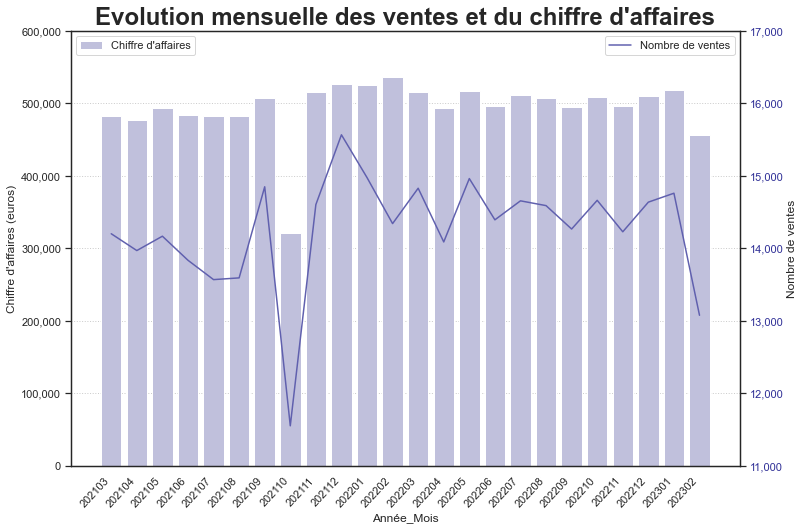

In [22]:
# 2-5-6 REPRESEDNTATION GRAPHIQUE DE L'EVOLUTIION MENSUELLE DU CA ET DES VENTES DANS LE TEMPS.

fig = plt.figure(figsize=(12, 8))

ax1 = plt.axes()

ax1.bar(analyse_mois.index, analyse_mois.chiffre_affaires, label="Chiffre d'affaires", color=liste_couleurs[1])

ax1.set_ylabel("Chiffre d'affaires (euros)")

ax1.set_xticklabels(analyse_mois.index, rotation = 47, ha="right")

ax1.set_ylim([0,600000])

ax1.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))

ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.plot(analyse_mois.index, analyse_mois.nombre_ventes, label="Nombre de ventes", color=liste_couleurs[3])

ax2.set_ylabel("Nombre de ventes")

ax2.set_ylim([11000,17000])

ax2.set_yticklabels(np.arange(11000,17001,1000), color=liste_couleurs[4])

ax2.yaxis.set_major_formatter(plticker.StrMethodFormatter('{x:,.0f}'))

ax2.legend(loc='upper right')

ax1.set_xlabel("Année_Mois")

ax1.grid(axis="y", linestyle=":")

plt.title("Evolution mensuelle des ventes et du chiffre d'affaires", fontsize= 24, fontweight="bold")

plt.savefig('graph/4- Evol_Msl_CA_Vtes.png')

plt.show()

In [23]:
# 2-6 EVOLUTION CHRONOLOGIQUE DU CHIFFRE D'AFFAIRES ET DU VOLUME DES VENTES : VUE PRECISE.

# 2-6-1 EVOLUTION PAR HEURE DU CHIFFRE D'AFFAIRES ET DU VOLUME DES VENTES.

cat_names = np.sort(transactions.p_cat.unique())
    
# 2-6-1-1 CALCULONS UN df QUI CONTIENT L'UNITE DE TEMPS, LA CATEGORIE ET LE PRIX.
    
df = transactions[['t_hour', 'p_cat', 'p_price']].groupby(['t_hour', 'p_cat']).agg({'p_price':['sum', 'count']}).reset_index()
    
df.columns = ['t_hour', 'p_cat', 'ca', 'volume']

# 2-6-1-2 VISUALISATION DE df.

df

,t_hour,p_cat,ca,volume
0,0.0,0,184225.62,17346
1,0.0,1,184744.16,9040
2,0.0,2,114968.31,1521
3,1.0,0,185678.84,17350
4,1.0,1,193985.39,9451
...,...,...,...,...
67,22.0,1,190402.74,9344
68,22.0,2,120274.04,1577
69,23.0,0,184370.74,17360
70,23.0,1,196956.53,9608


In [24]:
# 2-6-1-3 DETERMINONS LES VALEURS DE TEMPS EN X.
    
x = df['t_hour'].sort_values().unique()

# 2-6-1-4 VISUALISATION DE x.

x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

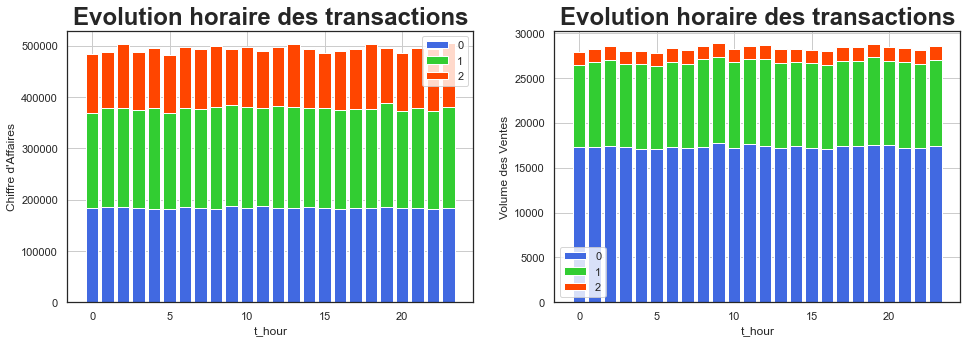

In [25]:
# 2-6-1-5 POUR CHAQUE CATEGORIE,CALCULONS: LES VALEURS DU CA ET DU VOLUME DES VENTES. 
    
cat_vals = []

for cat in cat_names:
    
    ca = df[df.p_cat == cat].sort_values('t_hour').ca.values
    
    volume = df[df.p_cat == cat].sort_values('t_hour').volume.values
    
    cat_vals.append({'cat_name': cat, "Chiffre d'Affaires": ca, 'Volume des Ventes': volume})

plt.figure(figsize=(16,5))

for k, element in enumerate(["Chiffre d'Affaires", 'Volume des Ventes']):
    
    plt.subplot(1,2,k+1)
    
    # pour le ca, puis le volume, on genere le graphique en bar
    
    colors = ['royalblue', 'limegreen', 'orangered']
    
    for i, cat in enumerate(cat_names):
        
        plt.bar(x, cat_vals[cat][element], 
                
                color=colors[i],
                
                label=cat_vals[cat]['cat_name'],
                
                bottom = np.sum([cat_vals[j][element] for j in range(i)], axis=0))
        
    plt.xlabel('t_hour')
    
    plt.ylabel(element)
    
    plt.grid(True)

    plt.title('Evolution horaire des transactions', fontsize= 24, fontweight="bold")
    
    plt.legend()

plt.savefig('graph/5- Evol_Hrs_CA_Vtes.png') 

plt.show()

In [26]:
# 2-6-2 EVOLUTION PAR SEMAINE DU CHIFFRE D'AFFAIRES ET DU VOLUME DES VENTES.

cat_names = np.sort(transactions.p_cat.unique())
    
# 2-6-2-1 CALCULONS UN df QUI CONTIENT L'UNITE DE TEMPS, LA CATEGORIE ET LE PRIX.
    
df = transactions[['t_day_week_num', 'p_cat', 'p_price']].groupby(['t_day_week_num', 'p_cat']).agg({'p_price':['sum', 'count']}).reset_index()
    
df.columns = ['t_day_week_num', 'p_cat', 'ca', 'volume']

# 2-6-2-2 VISUALISATION DE df.

df

,t_day_week_num,p_cat,ca,volume
0,0.0,0,635537.37,59823
1,0.0,1,665384.01,32497
2,0.0,2,413539.16,5440
3,1.0,0,640040.67,60105
4,1.0,1,677580.56,33038
5,1.0,2,394246.10,5192
6,2.0,0,636692.21,59884
7,2.0,1,665947.99,32497
8,2.0,2,384355.17,5021
9,3.0,0,626046.38,58842


In [27]:
# 2-6-2-3 DETERMINONS LES VALEURS DE TEMPS EN X.
    
x = df['t_day_week_num'].sort_values().unique()

# 2-6-2-4 VISUALISATION DE x.

x

array([0., 1., 2., 3., 4., 5., 6.])

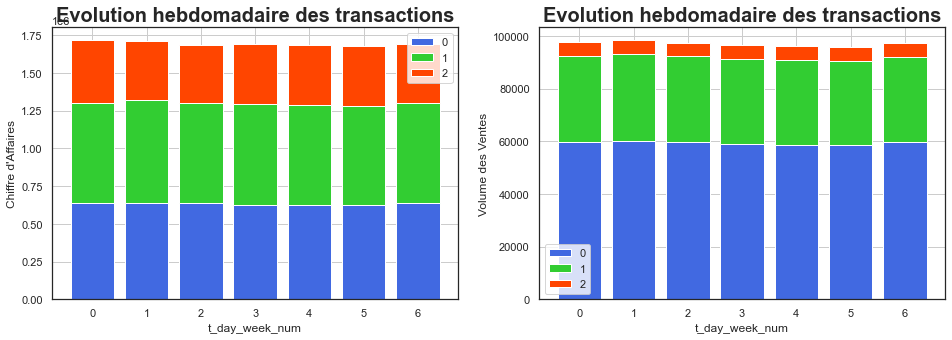

In [28]:
# 2-6-2-5 POUR CHAQUE CATEGORIE,CALCULONS: LES VALEURS DU CA ET DU VOLUME DES VENTES. 
    
cat_vals = []

for cat in cat_names:
    
    ca = df[df.p_cat == cat].sort_values('t_day_week_num').ca.values
    
    volume = df[df.p_cat == cat].sort_values('t_day_week_num').volume.values
    
    cat_vals.append({'cat_name': cat, "Chiffre d'Affaires": ca, 'Volume des Ventes': volume})

plt.figure(figsize=(16,5))

for k, element in enumerate(["Chiffre d'Affaires", 'Volume des Ventes']):
    
    plt.subplot(1,2,k+1)
    
    # pour le ca, puis le volume, on genere le graphique en bar
    
    colors = ['royalblue', 'limegreen', 'orangered']
    
    for i, cat in enumerate(cat_names):
        
        plt.bar(x, cat_vals[cat][element], 
                
                color=colors[i],
                
                label=cat_vals[cat]['cat_name'],
                
                bottom = np.sum([cat_vals[j][element] for j in range(i)], axis=0))
        
    plt.xlabel('t_day_week_num')
    
    plt.ylabel(element)
    
    plt.grid(True)

    plt.title('Evolution hebdomadaire des transactions', fontsize= 20, fontweight="bold")
    
    plt.legend()

plt.savefig('graph/6- Evol_Days_Week_CA_Vtes.png')    

plt.show() 

In [29]:
# 2-6-3 EVOLUTION PAR PART DE MOIS DU CHIFFRE D'AFFAIRES ET DU VOLUME DES VENTES.

cat_names = np.sort(transactions.p_cat.unique())
    
# 2-6-3-1 CALCULONS UN df QUI CONTIENT L'UNITE DE TEMPS, LA CATEGORIE ET LE PRIX.
    
df = transactions[['t_month_part', 'p_cat', 'p_price']].groupby(['t_month_part', 'p_cat']).agg({'p_price':['sum', 'count']}).reset_index()
    
df.columns = ['t_month_part', 'p_cat', 'ca', 'volume']
    
# 2-6-3-2 VISUALISATION DE df.

df

,t_month_part,p_cat,ca,volume
0,0,0,1.132762e+06,107013
1,0,1,1.226638e+06,59797
2,0,2,7.269154e+05,9487
3,1,0,1.248165e+06,117075
4,1,1,1.303034e+06,63583
5,1,2,7.659973e+05,10052
6,2,0,1.311568e+06,122954
7,2,1,1.336254e+06,65338
8,2,2,8.036691e+05,10634
9,3,0,7.295175e+05,68638


In [30]:
# 2-6-3-3 DETERMINONS LES VALEURS DE TEMPS EN X.
    
x = df['t_month_part'].sort_values().unique()

# 2-6-3-4 VISUALISATION DE x.

x

array([0, 1, 2, 3], dtype=int64)

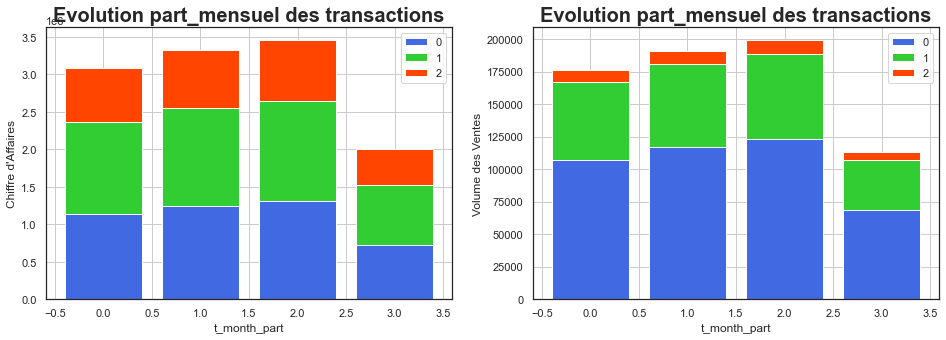

In [31]:
# 2-6-3-5 POUR CHAQUE CATEGORIE,CALCULONS: LES VALEURS DU CA ET DU VOLUME DES VENTES. 
    
cat_vals = []

for cat in cat_names:
    
    ca = df[df.p_cat == cat].sort_values('t_month_part').ca.values
    
    volume = df[df.p_cat == cat].sort_values('t_month_part').volume.values
    
    cat_vals.append({'cat_name': cat, "Chiffre d'Affaires": ca, 'Volume des Ventes': volume})

plt.figure(figsize=(16,5))

for k, element in enumerate(["Chiffre d'Affaires", 'Volume des Ventes']):
    
    plt.subplot(1,2,k+1)
    
    # pour le ca, puis le volume, on genere le graphique en bar
    
    colors = ['royalblue', 'limegreen', 'orangered']
    
    for i, cat in enumerate(cat_names):
        
        plt.bar(x, cat_vals[cat][element], 
                
                color=colors[i],
                
                label=cat_vals[cat]['cat_name'],
                
                bottom = np.sum([cat_vals[j][element] for j in range(i)], axis=0))
        
    plt.xlabel('t_month_part')
    
    plt.ylabel(element)
    
    plt.grid(True)

    plt.title('Evolution part_mensuel des transactions', fontsize= 20, fontweight="bold")
    
    plt.legend()

plt.savefig('graph/7- Evol_Month_Part_CA_Vtes.png')    

plt.show() 

In [32]:
# 2-6-4 EVOLUTION PAR MOIS DU CHIFFRE D'AFFAIRES ET DU VOLUME DES VENTES.

cat_names = np.sort(transactions.p_cat.unique())

# 2-6-4-1 CALCULONS UN df QUI CONTIENT L'UNITE DE TEMPS, LA CATEGORIE ET LE PRIX.
    
df = transactions[['t_month', 'p_cat', 'p_price']].groupby(['t_month', 'p_cat']).agg({'p_price':['sum', 'count']}).reset_index()
    
df.columns = ['t_month', 'p_cat', 'ca', 'volume']

# 2-6-4-2 VISUALISATION DE df.

df

,t_month,p_cat,ca,volume
0,1.0,0,345617.41,32477
1,1.0,1,466372.33,22812
2,1.0,2,231013.64,3004
3,2.0,0,345840.09,32554
4,2.0,1,393467.88,19248
5,2.0,2,253129.05,3355
6,3.0,0,385300.51,36196
7,3.0,1,393459.43,19260
8,3.0,2,219343.60,2861
9,4.0,0,380508.68,35835


In [33]:
# 2-6-4-3 DETERMINONS LES VALEURS DE TEMPS EN X.
    
x = df['t_month'].sort_values().unique()

# 2-6-4-4 VISUALISATION DE x.

x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

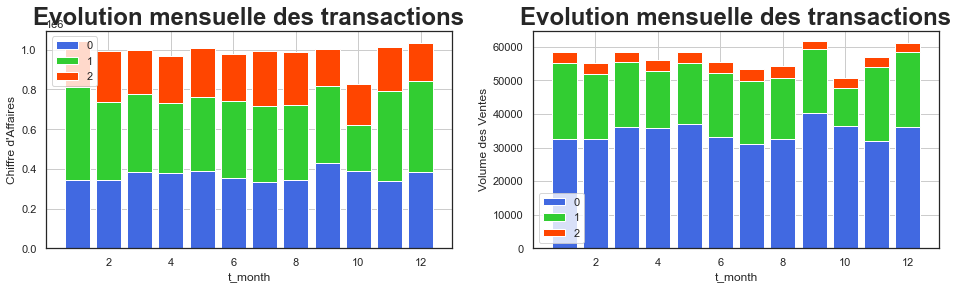

In [34]:
# 2-6-4-5 POUR CHAQUE CATEGORIE,CALCULONS: LES VALEURS DU CA ET DU VOLUME DES VENTES. 
    
cat_vals = []

for cat in cat_names:
    
    ca = df[df.p_cat == cat].sort_values('t_month').ca.values
    
    volume = df[df.p_cat == cat].sort_values('t_month').volume.values
    
    cat_vals.append({'cat_name': cat, "Chiffre d'Affaires": ca, 'Volume des Ventes': volume})

plt.figure(figsize=(16,4))

for k, element in enumerate(["Chiffre d'Affaires", 'Volume des Ventes']):
    
    plt.subplot(1,2,k+1)
    
    # pour le ca, puis le volume, on genere le graphique en bar
    
    colors = ['royalblue', 'limegreen', 'orangered']
    
    for i, cat in enumerate(cat_names):
        
        plt.bar(x, cat_vals[cat][element], 
                
                color=colors[i],
                
                label=cat_vals[cat]['cat_name'],
                
                bottom = np.sum([cat_vals[j][element] for j in range(i)], axis=0))
        
    plt.xlabel('t_month')
    
    plt.ylabel(element)
    
    plt.grid(True)

    plt.title('Evolution mensuelle des transactions', fontsize= 24, fontweight="bold")
    
    plt.legend()
        
plt.savefig('graph/8- Evol_Month_CA_Vtes.png')

plt.show() 

In [35]:
# 2-7 EVOLUTION MENSUELLE DU CHIFFRE D'AFFAIRES ET DU VOLUME DES VENTES PAR CATEGORIE DE PRODUITS. 

df = transactions.loc[
    :, 
    ['t_month', 'p_price', 'p_cat']]

df = pd.pivot_table(df, index='t_month', columns=['p_cat'], aggfunc=['sum', 'count']).reset_index()

df.columns = ['t_month', 'ca_0', 'ca_1', 'ca_2', 'vol0', 'vol1', 'vol2']

# 2-7-1 VISUALISATION DE df.

df

,t_month,ca_0,ca_1,ca_2,vol0,vol1,vol2
0,1.0,345617.41,466372.33,231013.64,32477,22812,3004
1,2.0,345840.09,393467.88,253129.05,32554,19248,3355
2,3.0,385300.51,393459.43,219343.60,36196,19260,2861
3,4.0,380508.68,351402.32,237486.20,35835,17081,3157
4,5.0,391306.74,371426.03,247590.98,36933,18154,3197
5,6.0,352022.49,391074.10,237152.57,33183,19054,3131
6,7.0,332012.91,382492.99,279277.74,31096,18639,3689
7,8.0,345285.82,374351.47,269290.21,32395,18259,3557
8,9.0,429899.87,385993.32,185678.74,40388,18834,2419
9,10.0,386855.44,233371.98,208664.53,36443,11392,2745


In [36]:
#  2-7-2 ETUDIONS LA SAISONALITE ET LA CATEGORIE REGULATRICES.

df = transactions[['p_cat', 'p_price', 't_month']]

df = pd.pivot_table(df, index='t_month', columns=['p_cat'], aggfunc=['sum', 'count']).reset_index()

df.columns = ['t_month', 'ca_0', 'ca_1', 'ca_2', 'vol0', 'vol1', 'vol2']

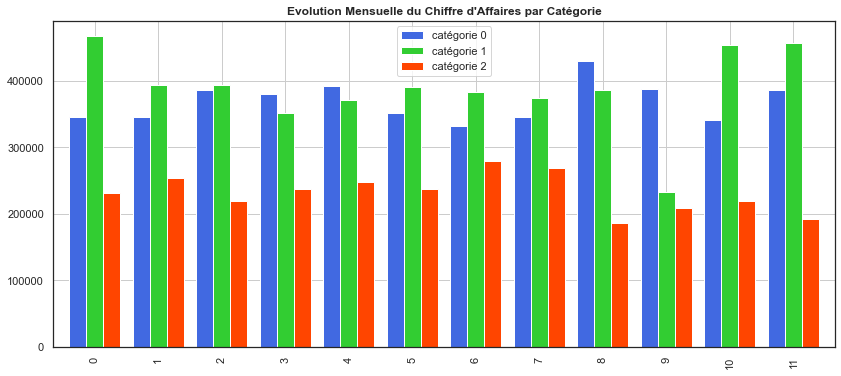

In [37]:
#  2-7-3 EVOLUTION MENSUELLE DU CHIFFRE D'AFFAIRES PAR CATEGORIE.

df[['ca_0', 'ca_1', 'ca_2']].plot.bar(
    
    figsize=(14,6), 
    
    width=0.8, 
    
    color=['royalblue', 'limegreen', 'orangered']
    
)

plt.legend(['catégorie 0', 'catégorie 1', 'catégorie 2'])

plt.grid(True)

plt.title('Evolution Mensuelle du Chiffre d\'Affaires par Catégorie', fontweight="bold")

plt.savefig('graph/9- Evol_Msl_CA_ctg.png')

plt.show() 

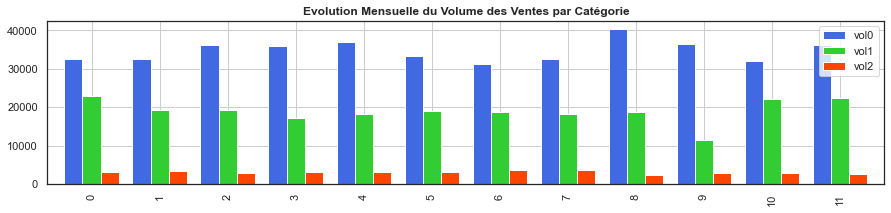

In [39]:
#  2-7-4 EVOLUTION MENSUELLE DU VOLUME DES VENTES PAR CATEGORIE.

df[['vol0', 'vol1', 'vol2']].plot.bar(
    
    figsize=(15,3), 
    
    width=0.8, 
    
    color=['royalblue', 'limegreen', 'orangered']
    
)

plt.grid(True)

plt.title('Evolution Mensuelle du Volume des Ventes par Catégorie', fontweight="bold")

plt.savefig('graph/10- Evol_Msl_Vtes_ctg.png')

plt.show() 

In [40]:
#  2-7-5 TAUX D'EVOLUTION DU CHIFFRE D'AFFAIRES ET DU VOLUME DES VENTES ENTRE LES DIFFERENTES QUART DU MOIS.

# 2-7-5-1 TRANSACTIONS DU CHIFFRE D'AFFAIRES ET DU VOLUME DES VENTES PAR QUART DU MOIS.

df = transactions[['t_month_part', 'p_price']].groupby('t_month_part').agg({'p_price': ['sum', 'count']}).reset_index()

df.columns = ['t_month_part', 'ca', 'volume']

# 2-7-5-2 VISUALISATION DE df.

df

,t_month_part,ca,volume
0,0,3.086315e+06,176297
1,1,3.317196e+06,190710
2,2,3.451491e+06,198926
3,3,2.001007e+06,113399


In [41]:
#  2-7-6 TAUX D'EVOLUTION DU CHIFFRE D'AFFAIRES ET DU VOLUME DES VENTES ENTRE LES PREMIER ET TROISIEME QUART DE CHAQUE MOIS.

# 2-7-6-1 CHIFFRE D'AFFAIRES DU TROISIEME QUART DU MOIS.

ca_2 = df.loc[df.t_month_part == 2, 'ca'].values[0]

# 2-7-6-2 VOLUME DES VENTES DU TROISIEME QUART DU MOIS.

vol_2 = df.loc[df.t_month_part == 2, 'volume'].values[0]

# 2-7-6-3 CHIFFRE D'AFFAIRES DU PREMIER QUART DU MOIS.

ca_0 = df.loc[df.t_month_part == 0, 'ca'].values[0]

# 2-7-6-4 VOLUME DES VENTES DU PREMIER QUART DU MOIS.

vol_0 = df.loc[df.t_month_part == 0, 'volume'].values[0]

# 2-7-6-5 TAUX D'EVOLUTION DU CHIFFRE D'AFFAIRES ENTRE LES PREMIER ET TROISIEME QUART DE CHAQUE MOIS.

tx_evol_ca = (ca_2 - ca_0) / ca_0

# 2-7-6-6 TAUX D'EVOLUTION DU VOLUME DES VENTES ENTRE LES PREMIER ET TROISIEME QUART DE CHAQUE MOIS.

tx_evol_vol = (vol_2 - vol_0) / vol_0

In [42]:
#  2-7-7 AFFICHONS LES RESULTATS DES TAUX D'EVOLUTION DU CHIFFRE D'AFFAIRES ET DU VOLUME DES VENTES ENTRE LES 1er ET 3e QUART DU MOIS.

print(f"Taux d'Evolution entre le 1er et 3eme quart de Mois : ")

print(f" - Chiffre d'Affaires : {tx_evol_ca*100:.0f}%")

print(f" - Volume des Ventes  : {tx_evol_vol*100:.0f}%")

Taux d'Evolution entre le 1er et 3eme quart de Mois : 
 - Chiffre d'Affaires : 12%
 - Volume des Ventes  : 13%


In [43]:
#  2-7-8 TAUX D'EVOLUTION DU CHIFFRE D'AFFAIRES ET DU VOLUME DES VENTES ENTRE LES TROISIEME ET QUATRIEME QUART DE CHAQUE MOIS.

# 2-7-8-1 CHIFFRE D'AFFAIRES DU QUATRIEME QUART DU MOIS.

ca_3 = df.loc[df.t_month_part == 3, 'ca'].values[0]

# 2-7-8-2 VOLUME DES VENTES DU QUATRIEME QUART DU MOIS.

vol_3 = df.loc[df.t_month_part == 3, 'volume'].values[0]

# 2-7-8-3 CHIFFRE D'AFFAIRES DU TROISIEME QUART DU MOIS.

ca_2 = df.loc[df.t_month_part == 2, 'ca'].values[0]

# 2-7-8-4 VOLUME DES VENTES DU TROISIEME QUART DU MOIS.

vol_2 = df.loc[df.t_month_part == 2, 'volume'].values[0]

# 2-7-8-5 TAUX D'EVOLUTION DU CHIFFRE D'AFFAIRES ENTRE LES TROISIEME ET QUATRIEME QUART DE CHAQUE MOIS.

tx_evol_ca = (ca_3 - ca_2) / ca_2

# 2-7-8-6 TAUX D'EVOLUTION DU VOLUME DES VENTES ENTRE LES TROISIEME ET QUATRIEME QUART DE CHAQUE MOIS.

tx_evol_vol = (vol_3 - vol_2) / vol_2

In [44]:
#  2-7-9 AFFICHONS LES RESULTATS DES TAUX D'EVOLUTION DU CHIFFRE D'AFFAIRES ET DU VOLUME DES VENTES ENTRE LES 3e ET 4e  QUART DU MOIS.

print(f"Taux d'Evolution entre le 3eme et 4eme quart de Mois : ")

print(f" - Chiffre d'Affaires : {tx_evol_ca*100:.0f}%")

print(f" - Volume des Ventes  : {tx_evol_vol*100:.0f}%")

Taux d'Evolution entre le 3eme et 4eme quart de Mois : 
 - Chiffre d'Affaires : -42%
 - Volume des Ventes  : -43%


In [45]:
#  RQ: LA BAISSE DU QUATRIEME QUART DU MOIS SEMBLE DUE A UNE INFLEXION DES RESULTATS DU MOIS D'OCTOBRE QU'IL CONVIENT D'ANALYSER.

# 2-7-10 EVOLUTION DU CHIFFRE D'AFFAIRES ET DU VOLUME DES VENTES DU MOIS D'OCTOBRE.

vte_aou           = transactions.loc[transactions.t_month==8, 'p_price'].count()

ca_sep            = transactions.loc[transactions.t_month==9, 'p_price'].sum()

vte_sep           = transactions.loc[transactions.t_month==9, 'p_price'].count()

ca_oct            = transactions.loc[transactions.t_month==10, 'p_price'].sum()

vte_oct           = transactions.loc[transactions.t_month==10, 'p_price'].count()

vte_taux_evol_sep = (vte_sep - vte_aou) / vte_aou

ca_taux_evol_oct  = (ca_oct - ca_sep) / ca_sep

vte_taux_evol_oct = (vte_oct - vte_sep) / vte_sep

print(f"Taux d'évolution du volume de ventes (VTE) de Août à Septembre: {vte_taux_evol_sep*100:.0f}%")

print(f"Taux d'évolution du Chiffre d'Affaires (CA) de Septembre à Octobre: {ca_taux_evol_oct*100:.0f}%")

print(f"Taux d'évolution du volume de ventes (VTE) de Septembre à Octobre: {vte_taux_evol_oct*100:.0f}%")

Taux d'évolution du volume de ventes (VTE) de Août à Septembre: 14%
Taux d'évolution du Chiffre d'Affaires (CA) de Septembre à Octobre: -17%
Taux d'évolution du volume de ventes (VTE) de Septembre à Octobre: -18%


In [46]:
# 2-11 TRANSACTIONS DU MOIS D'OCTOBRE. 

# 2-11-1 AVONS-NOUS LES DONNEES DES PRODUITS DE CATEGORIE 1 POUR TOUS LES JOURS DU MOIS D'OCTOBRE 2021?

octobre_cat1=sorted(transactions[(transactions['t_month']==10) & (transactions['t_year']==2021) & (transactions['p_cat']==1)]['t_day'].unique().tolist())

print('En octobre 2021 les produits de la catégorie 1 ont été vendus seulement : le', end=' ')

print(*octobre_cat1, sep=' octobre, le ', end=' octobre')

En octobre 2021 les produits de la catégorie 1 ont été vendus seulement : le 1.0 octobre, le 28.0 octobre, le 29.0 octobre, le 30.0 octobre, le 31.0 octobre

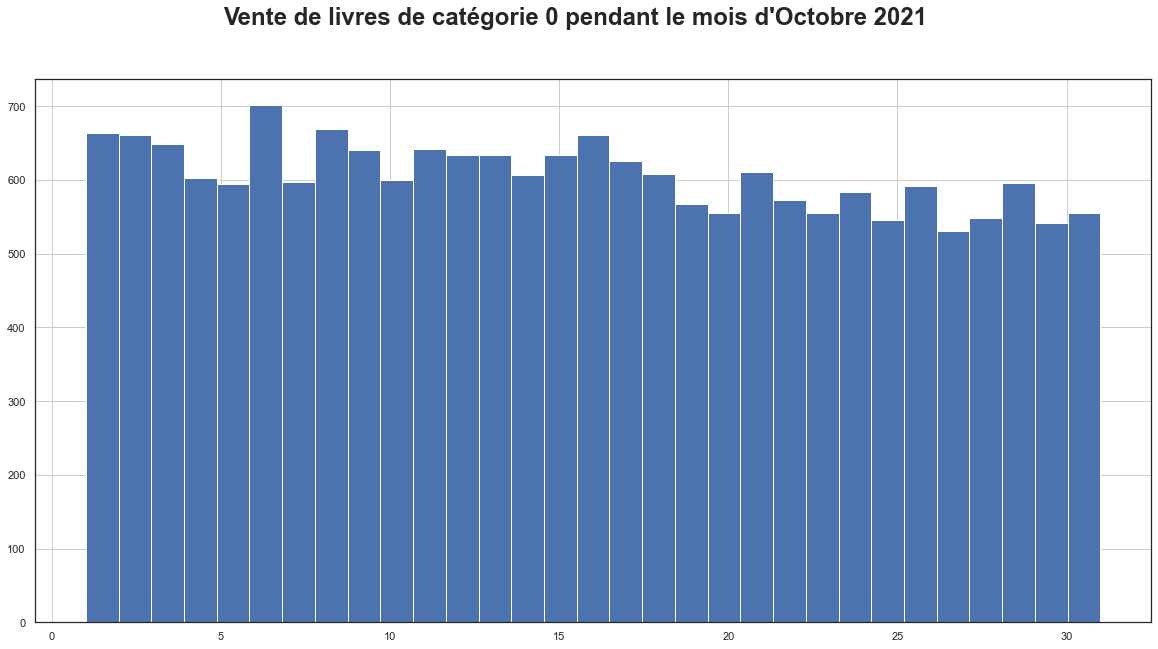

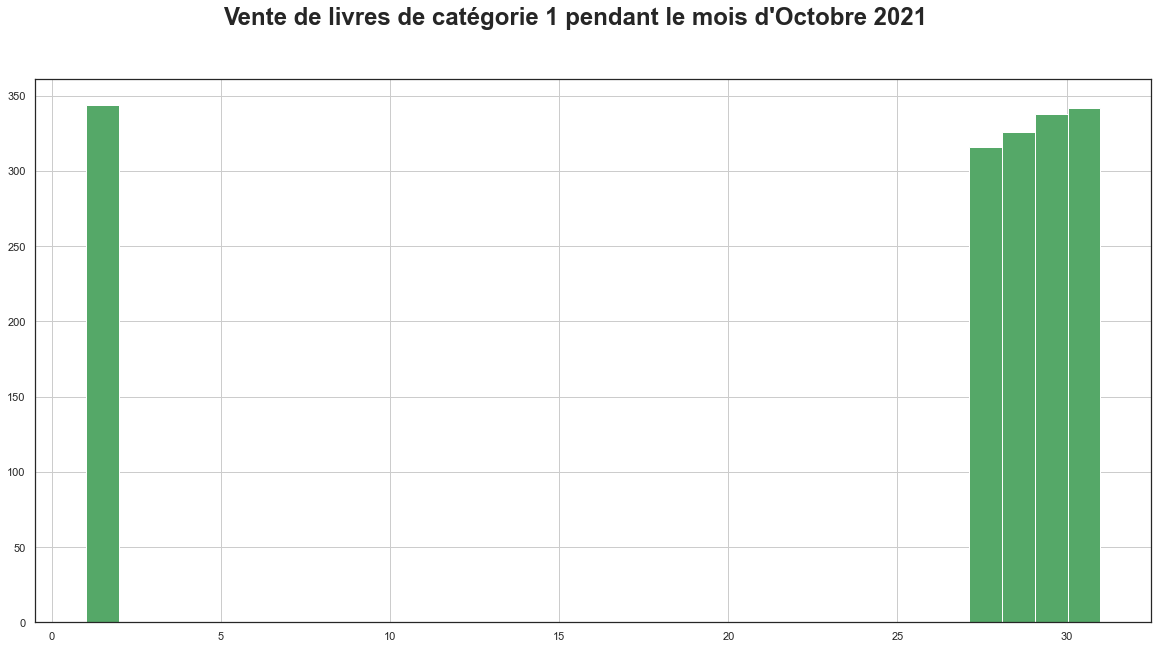

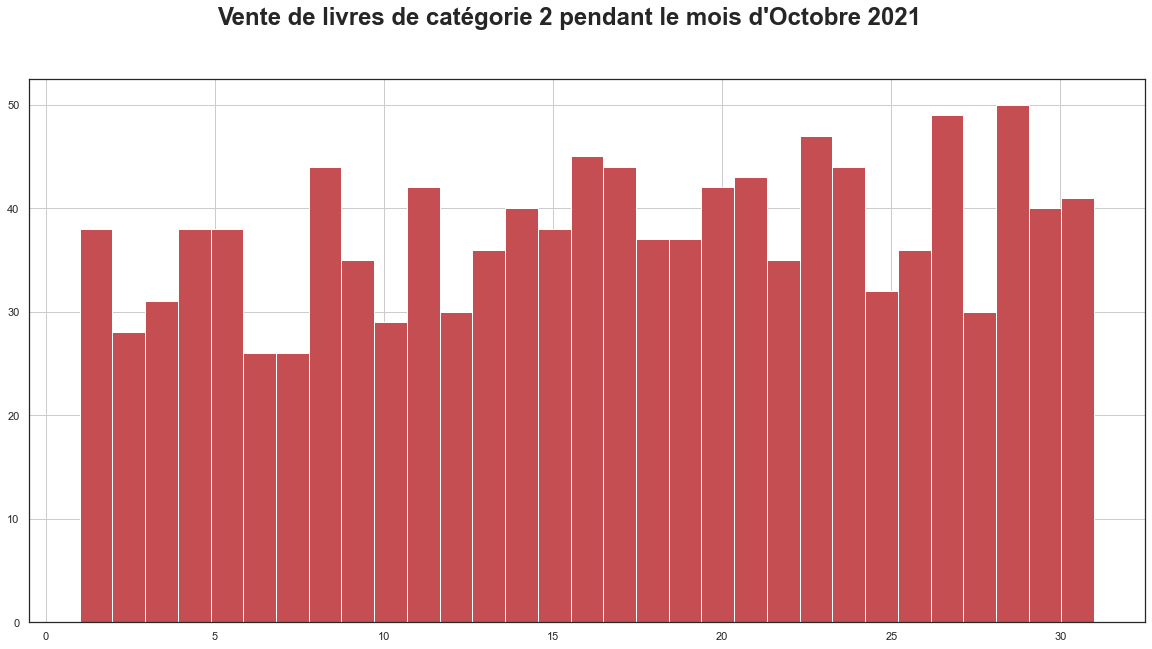

In [47]:
# 2-11-2 REPRESENTATION GRAPHIQUE DES TRANSACTIONS DE PRODUITS DU MOIS D'OCTOBRE 2021.

fig, axes = plt.subplots(1, 1, figsize = (20, 10))

transactions[(transactions['t_month']==10) & (transactions['t_year']==2021) & (transactions['p_cat']==0)]['t_day'].hist(bins=31, color='b')

fig.suptitle("Vente de livres de catégorie 0 pendant le mois d'Octobre 2021", fontsize= 24, fontweight="bold")

plt.savefig('graph/11- Evol_Msl_Vtes_ctg.png')

plt.show() 

fig, axes = plt.subplots(1, 1, figsize = (20, 10))

transactions[(transactions['t_month']==10) & (transactions['t_year']==2021) & (transactions['p_cat']==1)]['t_day'].hist(bins=31, color='g')

fig.suptitle("Vente de livres de catégorie 1 pendant le mois d'Octobre 2021", fontsize= 24, fontweight="bold")

plt.savefig('graph/12- Evol_Msl_Vtes_ctg.png')

plt.show() 

fig, axes = plt.subplots(1, 1, figsize = (20, 10))

transactions[(transactions['t_month']==10) & (transactions['t_year']==2021) & (transactions['p_cat']==2)]['t_day'].hist(bins=31, color='r')

fig.suptitle("Vente de livres de catégorie 2 pendant le mois d'Octobre 2021", fontsize= 24,  fontweight="bold")

plt.savefig('graph/13- Evol_Msl_Vtes_ctg.png')

plt.show() 

In [48]:
# 3- ANALYSE DES PRODUITS.

# 3-1 PRODUITS VENDUS.

produits_vendus = transactions.loc[:, 'p_id':'p_cat'].drop_duplicates()

produits_vendus

,p_id,p_price,p_price_range,p_cat
0,0_1518,4.18,cheap 4-9,0
674,0_1627,3.99,very_cheap 3-,0
1364,0_1104,13.21,medium 10-19,0
1916,0_1390,19.37,medium 10-19,0
2796,0_1547,8.99,cheap 4-9,0
...,...,...,...,...
679322,0_69,25.99,expensive 20-79,0
679326,0_1633,24.99,expensive 20-79,0
679327,1_408,35.24,expensive 20-79,1
679330,2_81,86.99,very_expansive 80+,2


In [49]:
# 3-2 PRODUITS INVENDUS.

# 3-2-1 PRODUITS NON VENDUS  A NOS CLIENTS, LEURS PRIX ET CATEGORIES RESPECTIFS. 

produits_invendus.sort_values('p_price')

,p_id,p_cat,p_price,p_price_range
10,0_1620,0.0,0.80,very_cheap 3-
4,0_1014,0.0,1.15,very_cheap 3-
1,0_1780,0.0,1.67,very_cheap 3-
15,0_310,0.0,1.94,very_cheap 3-
3,0_1119,0.0,2.99,very_cheap 3-
9,0_322,0.0,2.99,very_cheap 3-
8,0_1645,0.0,2.99,very_cheap 3-
2,0_1062,0.0,20.08,expensive 20-79
20,0_2308,0.0,20.28,expensive 20-79
6,0_1318,0.0,20.92,expensive 20-79


In [50]:
# 3-2-2 POURCENTAGE DES PRODUITS INVENDUS.

print(f"{produits_invendus.shape[0] / (produits_vendus.shape[0] + produits_invendus.shape[0]) * 100 :.2f}% des Produits sont Invendus.")

0.64% des Produits sont Invendus.


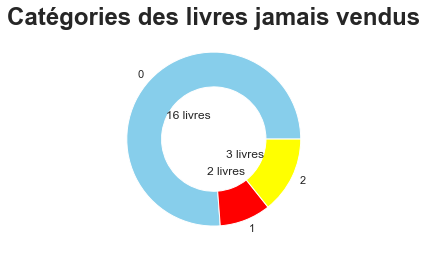

In [51]:
# 3-2-3 FONCTION QUI AFFICHE LES VALEURS DE SEGMENTS.

def func(pct, allvals):
    
    absolute = int(pct/100.*len(allvals))
    
    return "{:d} livres".format(absolute)

# 3-2-3-1 REPRESENTATION GRAPHIQUE DES PRODUITS INVENDUS.

fig, ax = plt.subplots()

# 3-2-3-2 Create a set of colors

colors=['skyblue','red','yellow']

wedges, text, autotext = ax.pie([16, 2, 3], labels=[0, 1, 2], labeldistance=1.1, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors, autopct=lambda pct: func(pct, produits_invendus['p_cat']), pctdistance=0.4)

# 3-2-3-3 OBTENONS UN DONUT.

plt.setp( wedges, width = 0.4)

plt.title('Catégories des livres jamais vendus', fontsize= 24,  fontweight="bold")

plt.savefig('graph/14- Ctg_p_invendus.png')

plt.show()

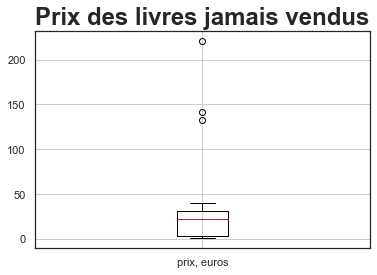

In [52]:
# 3-2-4 REPRESENTATION GRAPHIQUE DE LA DISTRIBUTION DES PRIX DES PRODUITS INVENDUS.

medianprops = dict(linestyle='-', linewidth=1, color='firebrick')

plt.boxplot(produits_invendus['p_price'], medianprops = medianprops)

plt.grid(True)

plt.xticks([1], ['prix, euros'])

plt.title('Prix des livres jamais vendus', fontsize= 24, fontweight="bold")

plt.savefig('graph/15- Dist_p_invendus.png')

plt.show()

In [53]:
# 3-3 LES PRODUITS VENDUS AU MOINS UNE FOIS.

cat_prices = {
    
    cat: produits_vendus.loc[
        
            (produits_vendus.p_cat==cat)
        
          & (produits_vendus.p_price),
        
        'p_price'
        
        ]
    
    for cat in [0,1,2]}

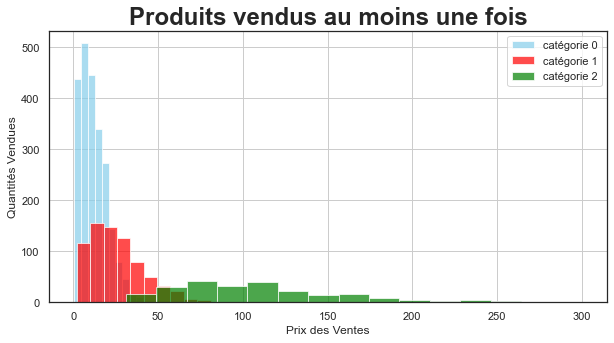

In [54]:
# 3-3-1 REPRESENTATION GRAPHIQUE DES PRODUITS VENDUS AU MOINS UNE FOIS.

# 3-3-2 Create a set of colors

colors=['skyblue','red','green']

plt.figure(figsize=(10,5))

plt.hist(cat_prices[0], bins=10, alpha=0.7, color='skyblue' )

plt.hist(cat_prices[1], bins=10, alpha=0.7, color='red')

plt.hist(cat_prices[2], bins=15, alpha=0.7, color='green')

plt.legend(['catégorie 0', 'catégorie 1', 'catégorie 2'])

plt.xlabel('Prix des Ventes')

plt.ylabel('Quantités Vendues')

plt.grid(True)

plt.plot()

plt.title('Produits vendus au moins une fois', fontsize= 24, fontweight="bold")

plt.savefig('graph/16- P_vdu_omoins_1_fois.png')

plt.show()

In [55]:
# 3-3-3 INDICATEURS STATISTIQUES DES PRIX DES PRODUITS PAR CATEGORIES .

prix_p_cat = pd.DataFrame([produits_vendus[produits_vendus.p_cat == 0].p_price.describe(), produits_vendus[produits_vendus.p_cat == 1].p_price.describe(), \
                     produits_vendus[produits_vendus.p_cat == 2].p_price.describe()], \
        ["Prix des produits de la catégorie 0","Prix des produits de la catégorie 1","Prix des produits de la catégorie 2"])

prix_p_cat

,count,mean,std,min,25%,50%,75%,max
Prix des produits de la catégorie 0,2293.0,11.714152,7.528651,0.62,5.63,10.32,16.470,40.99
Prix des produits de la catégorie 1,737.0,25.503623,15.435471,2.00,13.35,22.99,33.990,80.99
Prix des produits de la catégorie 2,236.0,107.636017,49.255576,30.99,70.69,101.25,134.945,300.00


In [56]:
# 3-3-4 FREQUENCE DES PRODUITS VENDUS PAR CATEGORIE.

freqces = produits_vendus.p_cat.value_counts()

# 3-3-4-1 VISUALISATION DE df_ca_vte.

freqces

0    2293
1     737
2     236
Name: p_cat, dtype: int64

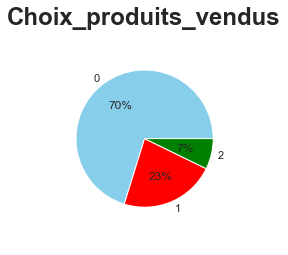

In [57]:
# 3-3-4-2 REPRESENTATION GRAPHIQUE DU CHOIX DES PRODUITS VENDUS PAR CATEGORIES.

# 3-3-4-3 Create a set of colors

colors=['skyblue','red','green']

plt.subplot(1,2,1)

plt.pie(freqces, autopct='%1.0f%%', labels=freqces.index.values, colors=colors)

plt.axis('equal')

plt.title('Choix_produits_vendus', fontsize= 24, fontweight="bold")

plt.plot()

plt.savefig('graph/17- Frce_p_vdus_ctg.png')

plt.show()

In [58]:
# 3-3-5 POUR TOUTES TRANSACTIONS DES PRODUITS VENDUS, AGREGER  PAR CATEGORIE, LE CA ET LE VOLUME DES VENTES.

df_ca_vte = transactions[['p_cat', 'p_price']].groupby('p_cat').agg({'p_price': ['count', 'sum']}).reset_index()

# 3-3-5-1 NOUVELLES COLONNES DU DATAFRAME (df)

df_ca_vte.columns = ['p_cat', 'volume', 'ca']

# 3-3-5-2 VISUALISATION DE df_ca_vte.

df_ca_vte

,p_cat,volume,ca
0,0,415680,4.422012e+06
1,1,227169,4.653723e+06
2,2,36483,2.780275e+06


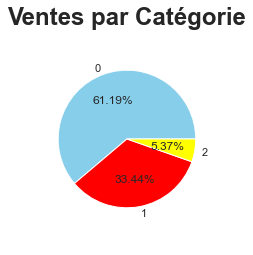

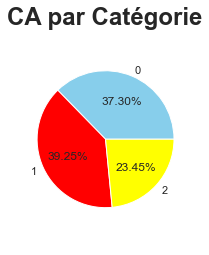

In [59]:
# 3-3-5-3 REPRESENTATION DU CA ET DU VOLUME DES VENTES PAR CATEGORIES.

# 3-3-5-4 Create a set of colors

colors=['skyblue','red','yellow']

plt.subplot(1,2,1)

plt.pie(df_ca_vte.volume, autopct='%1.2f%%', labels=freqces.index.values, colors=colors)

plt.axis('equal')

plt.title('Ventes par Catégorie', fontsize= 24, fontweight="bold")

plt.plot()

plt.savefig('graph/18- Vol_vte_ctg.png')

plt.show()

# 3-3-5-5 REPRESENTATION GRAPHIQUE DU CA PAR CATEGORIE.

plt.subplot(1,2,2)

plt.pie(df_ca_vte.ca, autopct='%1.2f%%', labels=freqces.index.values, colors=colors)

plt.axis('equal')

plt.title('CA par Catégorie', fontsize= 24, fontweight="bold")

plt.plot()

plt.savefig('graph/19- CA_ctg.png')

plt.show()

In [60]:
#  3-3-6 LA CONCENTRATION DES VENTES DES PRODUITS.

# 3-3-6-1 POUR TOUTES TRANSACTIONS DES PRODUITS VENDUS, AGREGER  PAR INDICE DE PRODUITS, LE VOLUME DES VENTES ET LE CA.

df_conc = transactions[['p_id', 'p_price']].groupby('p_id').agg({
    
    'p_price': ['count', 'sum']
    
}).reset_index()

# 3-3-6-2 LES COLONNES DE LA CONCENTRATION DES PRODUITS VENDUS.

df_conc.columns = ['p_id', 't_number', 'ca']

# 3-3-6-3 VISUALISATION DE df_conc.

df_conc

,p_id,t_number,ca
0,0_0,1242,4657.50
1,0_1,487,5352.13
2,0_10,22,394.90
3,0_100,3,61.80
4,0_1000,432,2954.88
...,...,...,...
3261,2_95,4,395.96
3262,2_96,598,28650.18
3263,2_97,13,2092.87
3264,2_98,1,149.74


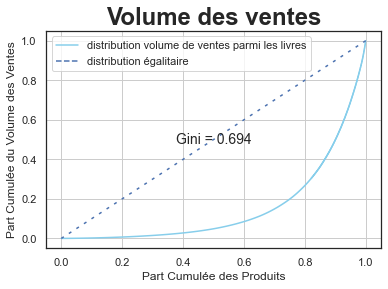

In [61]:
# 3-3-7 EXAMINONS LES PRODUITS LES PLUS VENDUS.

# 3-3-7-1 Create a set of colors

colors=['skyblue','red','yellow']

# 3-3-7-2 VOLUME DES VENTES

t_number = df_conc['t_number'].values

# 3-3-7-3 COURBE DE LORENZ.

lorenz = np.cumsum(np.sort(t_number)) / t_number.sum()

# 3-3-7-4 PREMIERE BISSECTRICE.

lorenz = np.append([0], lorenz)

# 3-3-7-5 DETERMINONS L'INDICE DE GINI.

aire_ss_courbe = lorenz[:-1].sum() / len(lorenz)

S = 0.5 - aire_ss_courbe

gini = 2*S

# 3-3-7-6 REPRESENTATION GRAPHIQUE DU VOLUME DES VENTES PAR LA COURBE DE LORENZ.

plt.plot(np.linspace(0,1,len(lorenz)), lorenz, drawstyle='steps-post', color='skyblue' )

plt.plot(np.linspace(0,1,len(lorenz)), np.linspace(0,1,len(lorenz)), dashes=[2,4], color='b')

plt.text(0.5,0.5,('Gini = '+ str(round(gini,3))),horizontalalignment='center',
     verticalalignment='center', fontsize=14)

plt.xlabel('Part Cumulée des Produits')

plt.ylabel('Part Cumulée du Volume des Ventes')

plt.grid(True)

plt.title('Volume des ventes', fontsize= 24, fontweight="bold")

plt.legend(handles=[mlines.Line2D([], [], color='skyblue', markersize=15, label="distribution volume de ventes parmi les livres"), 
                    
                    mlines.Line2D([], [], linestyle='--', color='b',markersize=15, label="distribution égalitaire")])

plt.savefig('graph/20- Cbe_Lorenz_vol_vte.png')

plt.show()

In [62]:
# 3-3-7-7 POURCENTAGE DES PRODUITS LES PLUS VENDUS.

p_plus_vdus  = df_conc[['p_id', 't_number']].sort_values('t_number', ascending=False)[:round(len(df_conc)*0.2)]

prctg_pdts   =  p_plus_vdus.p_id.count() / df_conc.p_id.count() * 100

prctg_vtes   = p_plus_vdus.t_number.sum() / df_conc.t_number.sum() * 100

print(f'{prctg_vtes:.0f}% des ventes sont faites sur {prctg_pdts:.0f}% des produits ({len(p_plus_vdus)} prod). ')

73% des ventes sont faites sur 20% des produits (653 prod). 


In [63]:
# 3-3-7-8 VISUALISATION DES PRODUITS LES PLUS VENDUS.

p_plus_vdus

,p_id,t_number
2592,1_369,2252
2645,1_417,2189
2642,1_414,2180
2734,1_498,2128
2654,1_425,2096
...,...,...
206,0_1188,339
212,0_1193,339
214,0_1195,339
187,0_1170,338


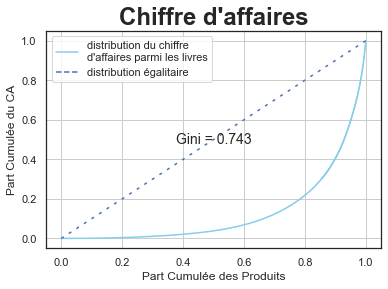

In [64]:
# 3-3-8 LES PRODUITS LES PLUS REMINERATEURS: EXAMINONS LES EVENTUELLES DISPARITES.

# 3-3-8-1 Create a set of colors

colors=['skyblue','red','yellow']

# 3-3-8-2 VALEURS DU CHIFFRE D'AFFAIRES. 

t_number = df_conc['ca'].values

# 3-3-8-3 COURBE DE LORENZ.

lorenz = np.cumsum(np.sort(t_number)) / t_number.sum()

# 3-3-8-4 PREMIERE BISSECTRICE.

lorenz = np.append([0], lorenz)

# 3-3-8-5 DETERMINONS L'INDICE DE GINI.

aire_ss_courbe = lorenz[:-1].sum() / len(lorenz)

S = 0.5 - aire_ss_courbe

gini = 2*S

# 3-3-8-6 REPRESENTATION GRAPHIQUE DE L'EVOLUTION DU CHIFFRE D'AFFAIRES PAR LA COURBE DE LORENZ.

plt.plot(np.linspace(0,1,len(lorenz)), lorenz, drawstyle='steps-post', color='skyblue' )

plt.plot(np.linspace(0,1,len(lorenz)), np.linspace(0,1,len(lorenz)), dashes=[2,4], color='b')

plt.text(0.5,0.5,('Gini = '+ str(round(gini,3))),horizontalalignment='center',
     verticalalignment='center', fontsize=14)

plt.ylabel('Part Cumulée du CA')

plt.xlabel('Part Cumulée des Produits')

plt.grid(True)

plt.title('Chiffre d\'affaires', fontsize= 24, fontweight="bold")

plt.legend(handles=[mlines.Line2D([], [], color='skyblue', markersize=15, label="distribution du chiffre  \nd'affaires parmi les livres"), 
                    
                    mlines.Line2D([], [], linestyle='--', color='b',markersize=15, label="distribution égalitaire")])

plt.savefig('graph/21- Cbe_Lorenz_CA.png')

plt.show()

In [65]:
# 3-3-8-7 LES PRODUITS LES PLUS RENTABLES.

p_plus_rtbl = df_conc[['p_id', 'ca']].sort_values('ca', ascending=False)[:round(len(df_conc)*0.2)]

nbr_pdts = len(p_plus_rtbl)

prctg_pdts =  p_plus_rtbl.p_id.count() / df_conc.p_id.count() * 100

prctg_ca = p_plus_rtbl.ca.sum() / df_conc.ca.sum() * 100

print(f'Les {prctg_pdts:.0f}% Produits (soit {nbr_pdts} Produits) les Plus Rentables Rapportent {prctg_ca:.0f}% du CA.')

Les 20% Produits (soit 653 Produits) les Plus Rentables Rapportent 78% du CA.


In [66]:
# 3-3-8-8 VISUALISATION DES PRODUITS LES PLUS RENTABLES.

p_plus_rtbl

,p_id,ca
3097,2_159,94893.50
3071,2_135,69334.95
3046,2_112,65407.76
3035,2_102,60736.78
3153,2_209,56971.86
...,...,...
42,0_1038,4538.84
709,0_1643,4519.34
388,0_1352,4518.00
29,0_1026,4516.20


In [67]:
# 3-3-9 EXAMINONS LES PRODUITS LES PLUS REMUNERATEURS.

# 3-3-9-1 Create a set of colors

colors=['skyblue','red','yellow']

df_pr = produits_vendus[produits_vendus.p_id.isin(p_plus_rtbl.p_id.values)]

# 3-3-9-2 JOINTURE ENTRE LES FICHIERS df_pr ET df_conc.

pdts_plus_rtbl = pd.merge(df_pr, df_conc[['p_id', 't_number']], on='p_id')

pdts_plus_rtbl

,p_id,p_price,p_price_range,p_cat,t_number
0,0_1104,13.21,medium 10-19,0,552
1,0_1390,19.37,medium 10-19,0,880
2,0_1547,8.99,cheap 4-9,0,568
3,1_379,26.99,expensive 20-79,1,1708
4,1_464,15.01,medium 10-19,1,1477
...,...,...,...,...,...
648,2_3,202.99,very_expansive 80+,2,28
649,1_679,79.99,expensive 20-79,1,61
650,1_586,61.23,expensive 20-79,1,96
651,2_190,175.67,very_expansive 80+,2,40


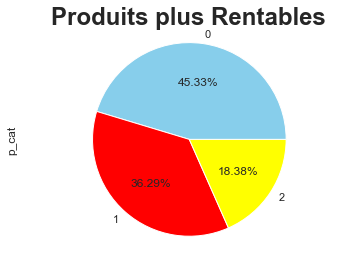

In [68]:
# 3-3-9-3 REPRESENTATION GRAPHIQUE DES CATEGORIES DES PRODUITS LES PLUS RENTABLES. 

pdts_plus_rtbl.p_cat.value_counts(normalize=True).plot(kind='pie', colors=colors, autopct=lambda x:f'{x:.2f}%') 

plt.axis('equal')

plt.title('Produits plus Rentables', fontsize= 24, fontweight="bold")

plt.savefig('graph/22-Ctg_p_plu_rtbl.png')

plt.show()

In [69]:
# 4 ANALYSE DES CLIENTS.

# 4-1 LES CLIENTS AYANT PROCEDE A L'ACHAT DES PRODUITS.

clients_avc_achat = transactions.loc[:,'c_id':'c_age_range'].drop_duplicates()

# 4-2 VISUALISATION DE clients_avc_achat.

clients_avc_achat

# 4-2-1 NOMBRE DE CLIENTS AYANT PROCEDE A L'ACHAT DES PRODUITS PAR TRANGE D'AGE (A).

clients_avc_achat.c_age_range.value_counts()

# 4-2-2 TOTAL DES CLIENTS AYANT PROCEDE A L'ACHAT DES PRODUITS DANS TOUTES LES TRANCHES D'AGE (B).

clients_avc_achat.c_age_range.count()

# 4-2-3 POURCENTAGE DES CLIENTS PAR TRANCHE D'AGE  (A/B) 1ere  FORMULE.

clients_avc_achat.c_age_range.value_counts() / clients_avc_achat.c_age_range.count()

# 4-2-4 POURCENTAGE DE CLIENTS PAR TRANCHE D'AGE  (A/B) 2e FORMULE.

clients_avc_achat.c_age_range.value_counts(normalize=True)

31-50    0.396628
51-70    0.285930
30-      0.241977
71+      0.075465
Name: c_age_range, dtype: float64

In [70]:
# 4-3 LES CLIENTS N'AYANT PROCEDE A AUCUN ACHAT.

# 4-3-1 CLIENTS INACTIFS (N'AYANT RIEN ACHETE), LEURS SEXE, ANNEE DE NAISSANCE ET AGE.

clients_sans_achat.sort_values(['c_age', 'c_sex'])

,c_id,c_sex,c_birth,c_age,c_age_range
13,c_5245,f,2004.0,19.0,30-
8,c_6930,m,2004.0,19.0,30-
15,c_6735,m,2004.0,19.0,30-
14,c_5223,m,2003.0,20.0,30-
12,c_6862,f,2002.0,21.0,30-
0,c_8253,f,2001.0,22.0,30-
18,c_90,m,2001.0,22.0,30-
9,c_4358,m,1999.0,24.0,30-
2,c_4406,f,1998.0,25.0,30-
1,c_3789,f,1997.0,26.0,30-


In [71]:
# 4-3-2 POURCENTAGE DES CLIENTS N'AYANT PROCEDE A AUCUN ACHAT.

print(f"Cela Représente {clients_sans_achat.shape[0] / (clients_sans_achat.shape[0] + clients_avc_achat.shape[0]) * 100 :.2f}% des Clients.")

Cela Représente 0.24% des Clients.


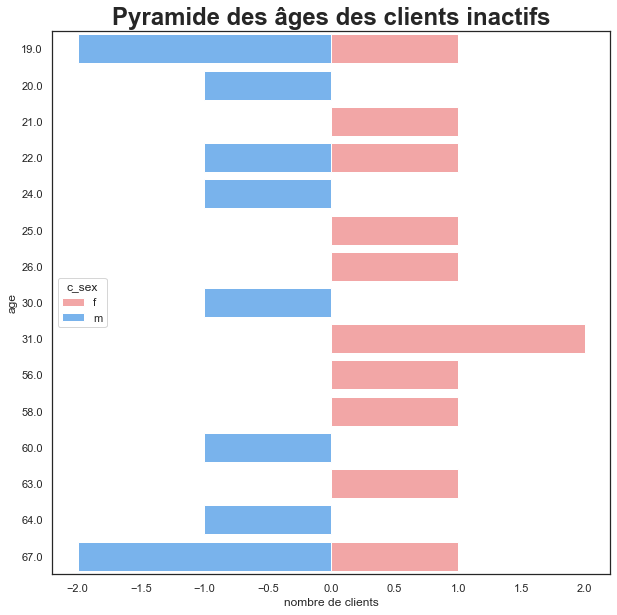

In [72]:
# 4-2-3 CLIENTS INACTIFS (N'AYANT RIEN ACHETE), LEURS SEXE, ANNEE DE NAISSANCE ET AGE.FAISONS UNE REPRESENTATION GRAPHIQUE POUR MIEUX VOIR LES AGES ET LES SEXES DES CLIENTS INACTIFS.

clt_sex = clients_sans_achat.groupby(['c_age', 'c_sex']).agg({'c_birth': 'count'}).rename(columns={'c_birth': 'nombre de clients'})

clt_sex.reset_index(inplace=True)

clt_sex.loc[clt_sex['c_sex']=='m', 'nombre de clients'] = clt_sex.loc[clt_sex['c_sex']=='m', 'nombre de clients']*(-1)

plt.figure(figsize=(10,10))

sns.barplot(data=clt_sex, x='nombre de clients', y='c_age',
            
            hue='c_sex',orient='horizontal', palette=['#ff9999', '#66b3ff'],
            
            dodge=False)

plt.ylabel('age')

plt.title('Pyramide des âges des clients inactifs', fontsize= 24, fontweight="bold")

plt.savefig('graph/23- Pmd_age_clt_intf.png')

plt.show()

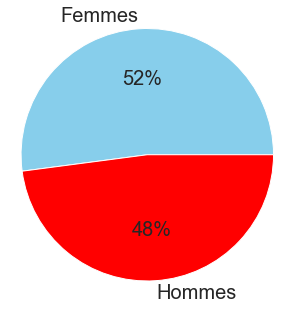

In [73]:
# 4-4 REPRESENTATION GRAPHIQUE DES CLIENTS AYANT PROCEDE A L'ACHAT PAR SEXE.

# 4-4-1 Create a set of colors

colors=['skyblue','red']

# 4-4-2 REPRESENTATION GRAPHIQUE.

plt.figure(figsize=(5,5))

plt.pie(clients_avc_achat.c_sex.value_counts(), colors=colors, autopct=lambda x:f'{x:.0f}%',labels=['Femmes', 'Hommes'],
        
        textprops={'fontsize': 20})

plt.axis('equal')

plt.savefig('graph/24- Clt_achat_sex.png')

plt.show()

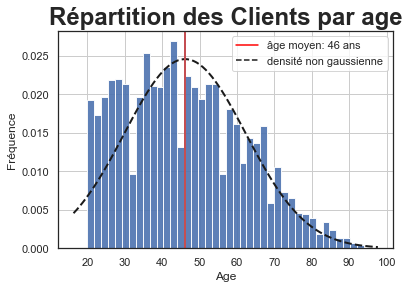

In [74]:
# 4-5 CLIENTS AYANT PROCEDE A L'ACHAT PAR AGE.

# 4-5-1 L'AGE DE 19 ANS ETANT SUR-REPRESENTE, NOUS L'EXCLUONS DE NOTRE ANALYSE AFIN D'EVITER DES RESULTATS BIAISES.

ages_ss_19 = clients_avc_achat.loc[clients_avc_achat.c_age !=19, 'c_age']

# Fit a normal distribution to the data: mean and standard deviation

mu, std = norm.fit(ages_ss_19) 

xbar=numpy.mean(ages_ss_19)

round(xbar,2)

# 4-5-2 REPREDENTATION GRAPHIQUE DES CLIENTS AYANT PROCEDE A l'ACHAT PAR AGE, EXCLUSION FAITE DE L'AGE DE 18 ANS.

plt.hist(ages_ss_19, density=True, bins=40, alpha=0.9, color='b')

# Plot the PDF.

xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)

p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k--', linewidth=2)

plt.grid(True)

plt.title('Répartition des Clients par age', fontsize= 24, fontweight="bold")

plt.axvline(xbar, color='r', linewidth=2)

plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="âge moyen: 46 ans"),
                    mlines.Line2D([], [], linestyle='--',color='k',markersize=15, label="densité non gaussienne")])

plt.xlabel('Âge')

plt.ylabel('Fréquence')

plt.savefig('graph/25- Age_clt.png')

plt.show()

In [75]:
# 4-5-3 INDICATEURS STATISTIQUES DE L'AGE DES CLIENTS AYANT PROCEDE A UN ACHAT, EXCLUSION FAITE DE L'AGE DE 18 ANS.

ages_ss_19.describe()

count    8163.000000
mean       46.117236
std        16.243253
min        20.000000
25%        33.000000
50%        45.000000
75%        58.000000
max        94.000000
Name: c_age, dtype: float64

In [76]:
# 4-5-4 TEST DE NORMALITE SUR L'AGE DES CLIENTS: SHAPIRO-WILKS.

w, pvalue = stats.shapiro(ages_ss_19)

print(w, pvalue)

0.9720826148986816 4.474558993955718e-37


C:\Users\yebel\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


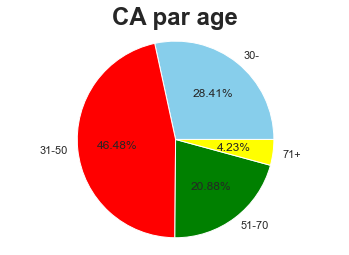

In [77]:
# 4-6 CONTRIBUTION DES CATEGORIES D'AGES AU CHIFFRE D'AFFAIRES.

# 4-6-1 Create a set of colors

colors=['skyblue','red','green','yellow']

df = transactions[['t_buyer_age_range', 'p_price']].groupby('t_buyer_age_range').sum().reset_index()

# 4-6-2 REPRESENTATION GRAPHIQUE DE LA CONTRIBUTION DES TRANCHES AU CHIFFRE D'AFFAIRES. 

plt.pie(df.p_price, autopct='%1.2f%%', labels=df.t_buyer_age_range, colors=colors)

plt.axis('equal')

plt.title("CA par age", fontsize= 24, fontweight="bold")

plt.savefig('graph/26- CA_trg_age.png')

plt.show()

In [78]:
# 4-6-3 VISUALISATION DE LA REPARTITION DU CA PAR TRANGE D'AGE.

df

# 4-6-3-1 CHIFFRE D'AFFAIRES PAR TRANCHE D'AGE.

CA_c_age_range      =     df.p_price

# 4-6-3-2 CHIFFRE D'AFFAIRES TOTAL DE TOUTES LES TRANCHES D'AGE.

Total_CA_c_age_range    =   CA_c_age_range.sum()

# CONTRIBUTION DE CHAQUE TRANCHE D'AGE AU CHIFFRE D'AFFAIRES.

df['pctge_ca']  = CA_c_age_range / Total_CA_c_age_range

df

,t_buyer_age_range,p_price,pctge_ca
0,30-,3.368237e+06,0.284095
1,31-50,5.510127e+06,0.464754
2,51-70,2.475758e+06,0.208819
3,71+,5.018867e+05,0.042332


In [79]:
# 4-7 FIDELITE DES CLIENTS.

df = transactions[['c_id', 'p_cat']].copy()

df['count'] = 1

df = pd.pivot_table(df, columns='p_cat', index='c_id', aggfunc='count').reset_index()

df.columns = ['c_id', 'cat0', 'cat1', 'cat2']

df = df.fillna(0)

df['cat_fidele'] = df.loc[:,'cat0':'cat2'].max(axis=1) / df.loc[:,'cat0':'cat2'].sum(axis=1)

df.sample()

,c_id,cat0,cat1,cat2,cat_fidele
2693,c_3425,2.0,11.0,8.0,0.52381


In [80]:
# 4-8 TENDANCE MOYENNE DE LA FIDELITE DES CLIENTS.

fidele_cat = df.cat_fidele.mean()

print(f'En Moyenne, {fidele_cat*100:.0f}% des Produits Achetés par un Client Proviennent de la même Catégorie.')

En Moyenne, 66% des Produits Achetés par un Client Proviennent de la même Catégorie.


In [81]:
# 4-9 ANALYSE DES CLIENTS SPECIAUX.

df = transactions.groupby('c_id').agg({
    'c_age':'mean',
    'c_sex':lambda x: x.mode(),
    't_sess_id':'count',
    'p_price':['sum', 'count'],
    'p_id': ['nunique']
    })

# 4-9-1 REINITIALISATION DE L'INDEX.

df = df.reset_index()

# 4-9-2 COLONNES DE df RELATIF AU CLIENTS SPECIAUX.

df.columns = ['c_id', 'c_age', 'c_sex', 'nb_sess', 'ca', 'nb_t', 'nb_prod_diff']

In [82]:
# 4-9-3 STOCKONS LES id DES CLIENTS SPECIAUX.

c_id_ab = df.loc[df.ca > 30000, 'c_id']

transactions.loc[transactions.c_id.isin(c_id_ab), 'data_info'] = 'c_special' 

len(c_id_ab)

print(c_id_ab)

677     c_1609
2724    c_3454
4388    c_4958
6337    c_6714
Name: c_id, dtype: object


In [83]:
# 4-9-4 VISUALISATION DU FICHIER DES CLIENTS SPECIAUX.

df[df.c_id.isin(c_id_ab)]

,c_id,c_age,c_sex,nb_sess,ca,nb_t,nb_prod_diff
677,c_1609,43.0,m,25488,324033.35,25488,1920
2724,c_3454,54.0,m,6773,113668.89,6773,1094
4388,c_4958,24.0,m,5195,289760.34,5195,467
6337,c_6714,55.0,f,9187,153660.84,9187,1381


In [84]:
# 4-9-3 CONTRIBUTION DES CLIENTS SPECIAUX (ABERRANTS) AU CHIFFRE D'AFFAIRES

clients_ab_ca = transactions.loc[transactions.data_info == 'c_special', 'p_price'].sum()

print(f'Les {len(c_id_ab)} Clients Abbérants Représentent {df[df.c_id.isin(c_id_ab)].ca.sum() / transactions.p_price.sum()*100:.2f}% du CA.')

clients_ab_ca

Les 4 Clients Abbérants Représentent 7.43% du CA.


881123.42

In [85]:
# 4-10 ANALYSONS LE PANIER MOYEN.

# 4-10-1 POUR TOUTES TRANSACTIONS, AGREGER PAR LA DUREE DES SESSIONS, LE CHIFFRE D'AFFAIRES ET LE VOLUME DES VENTES.

df = transactions[transactions.data_info != 'prod_imputation']\
.groupby('t_sess_id').agg({'p_price':['sum', 'count']}).reset_index()

# 4-10-2 COLONNE DU DATAFRAME DU PANIER MOYEN.

df.columns = ['t_sess_id', 'ca', 'nb_prod']

# 4-10-3 VISUALISATION DE df.

df

,t_sess_id,ca,nb_prod
0,s_1,11.99,1
1,s_10,26.99,1
2,s_100,33.72,2
3,s_1000,39.22,4
4,s_10000,41.49,3
...,...,...,...
342310,s_99994,28.92,3
342311,s_99995,19.84,1
342312,s_99996,56.27,4
342313,s_99997,6.99,1


In [86]:
# 4-10-4 CARATERISTIQUES DU PANIER MOYEN.

print(f"Le Panier Moyen est de {df.ca.mean():.2f}€ (l'Ecart-type est de {df.ca.std():.2f}€)")

Le Panier Moyen est de 34.63€ (l'Ecart-type est de 32.60€)


In [87]:
# 4-10-5 CARACTERISTIQUES DU PANIER ARTICLE.

print(f"Le Panier Article Contient {df.nb_prod.mean():.1f} Produits (l'Ecart-type est de {df.nb_prod.std():.2f})")

Le Panier Article Contient 2.0 Produits (l'Ecart-type est de 1.27)


In [88]:
# MISSION2: DEMANDE DE JULIE- ANALYSE CIBLEE SUR LES CLIENTS.

# 0- SUPPRIMONS TOUTES LES VALEURS ABBERANTES.
t_ss_c_ab = transactions[~
    transactions.data_info.isin(
        [
            'c_special', # les clients dont le ca est largement superieur
            # 'age_irrelevant', # les clients qui ont 18 ans
            'prod_imputation' # le produit dont on a imputé le prix
        ]
    )]

age_ranges = t_ss_c_ab.c_age_range.unique()

In [89]:
# 1-ANALYSONS LA CORRELATION ENTRE LE SEXE DES CLIENTS ET LA CATEGORIE DES PRODUITS ACHETES.

# 1-1 TABLEAU DE CONTINGENCE ACEC CROSSTAB.

tab_ctgce = pd.crosstab(t_ss_c_ab.p_cat, t_ss_c_ab.c_sex)

tab_ctgce

c_sex,f,m
p_cat,,
0,200904,186589
1,111331,101017
2,16980,15868


In [90]:
# 1-2 CALCUL DU KHI-2.

chi2, p, dof, expected = stats.chi2_contingency(tab_ctgce.values)

print(f'Le khi-2 est de {chi2:.2f} et la p-val est de {p:.4f}')

Le khi-2 est de 20.20 et la p-val est de 0.0000


In [91]:
# 1-3 CALCUL DES Xij AVEC NOTRE OBS ET LA DISTRIBUTION. TH.

len_l = tab_ctgce.shape[0]

len_k = tab_ctgce.shape[1]

# FONCTION QUI CALCULE DES Xlk 

xlk = np.zeros((len_l, len_k))
for l in range(len_l):
    for k in range(len_k):
        xlk[l,k] = (tab_ctgce.values[l,k]-expected[l,k])**2 / expected[l,k]

Xl_n = 20.200173796862927


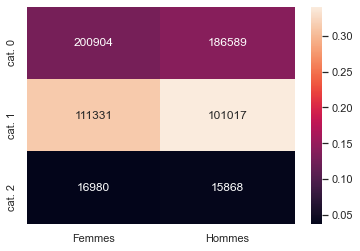

In [92]:
# 1-4 NORMALISATION DES Xlk PAR LE CHI2.

sns.heatmap(xlk / chi2, #np.zeros(tab_cont.shape)
            annot=tab_ctgce,
            fmt='d',
            yticklabels=[f'cat. {x}' for x in tab_ctgce.index],
            xticklabels=['Femmes', 'Hommes'])
plt.plot()

print(f"Xl_n = {xlk.sum()}")

In [183]:
# 2- ANALYSONS LA CORRELATION ENTRE L'AGE DES CLIENTS ET LE MONTANT TOTAL DES ACHATS.

# 2-1 AGREGATION DU PRIX DE DEPENSE TOTAL PAR L'UTILISATEUR.

df = t_ss_c_ab[['c_id', 'c_age', 'p_price', 'c_age_range']]

df = df.groupby('c_id').agg({
    'c_age': lambda x:x.mode(),
    'c_age_range': lambda x:x.mode(),
    'p_price':'sum'}
).reset_index()
df.columns = ['c_id', 'c_age', 'c_age_range', 'amount']

df.sample()

,c_id,c_age,c_age_range,amount
6524,c_6889,55.0,51-70,163.85


In [184]:
# 2-2 EN PRENANT L'AGE SOUS FORME QUANTITATIVE, NOUS OBTENONS.

df2 = df.groupby('c_age').agg({'amount': 'mean'}).reset_index()

# 2-2-1 VISUALISATION DE df2.

df2

,c_age,amount
0,19.0,1393.624005
1,20.0,1228.936414
2,21.0,1270.402138
3,22.0,1427.981600
4,23.0,1213.445735
...,...,...
71,90.0,658.083750
72,91.0,840.531667
73,92.0,703.862500
74,93.0,1003.467500


In [185]:
# 2-2-2 MODELE DE REGRESSION LINEAIRE.

# 2-2-2-1 X : LA VARIABLE EXPLICATIVE(INPUTS); y : LA VARIABLE EXPLIQUEE (RESULTAT: SORTIE).

X = df2.c_age.values

y = df2.amount.values

# 2-2-2-2 CREATION DU MODELE.

X_sm =  sm.add_constant(X)

model = sm.OLS(y, X_sm).fit()

# 2-2-2-3 CALCUL DE R2 ET DE LA P-VALUE.

rsquare = model.rsquared

pval = model.pvalues[0]

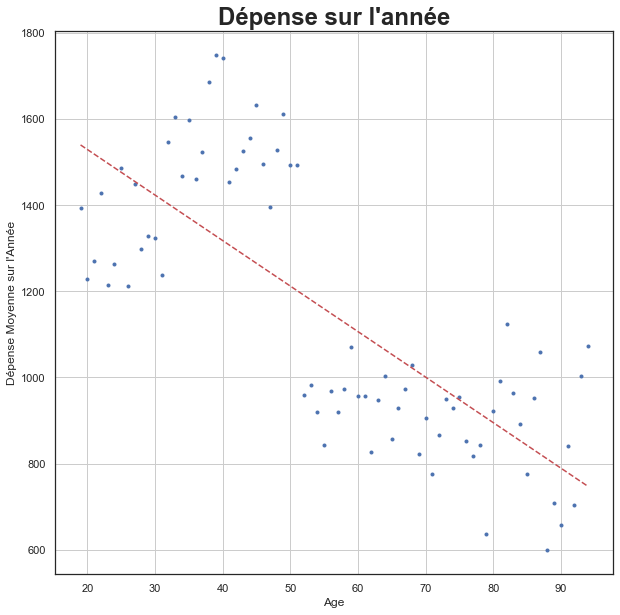

R-carré=0.57 & p-valeur=0.00


In [186]:
# 2-2-3 REPRESENTATION GRAPHIQUE DU MODELE DE REGRESSION LINEAIRE.

plt.figure(figsize=(10,10))

plt.grid(True)

plt.plot(X, y, 'b.')

plt.plot(X, model.predict(X_sm), 'r--')

plt.xlabel('Age')

plt.ylabel('Dépense Moyenne sur l\'Année')

plt.title('Dépense sur l\'année', fontsize= 24, fontweight="bold")

plt.savefig('graph/27- CA_trg_age.png')

plt.show()

print(f"R-carré={rsquare:.2f} & p-valeur={pval:.2f}")

In [187]:
# 2-4 AVEC L'AGE SOUS FORME QUALITATIVE.

age_ranges_amount = {age_range: df.loc[df.c_age_range==age_range, 'amount'] for age_range in age_ranges}

# DEPENSE MOYENNE ANNUELLE PAR TRANCHE D'AGE. ['30-']: 1334.20€; '31-50': 1534.97€;'51-70':974.54€; '71+': 879.98€.

age_ranges_amount['30-'].mean()

1334.182576923079

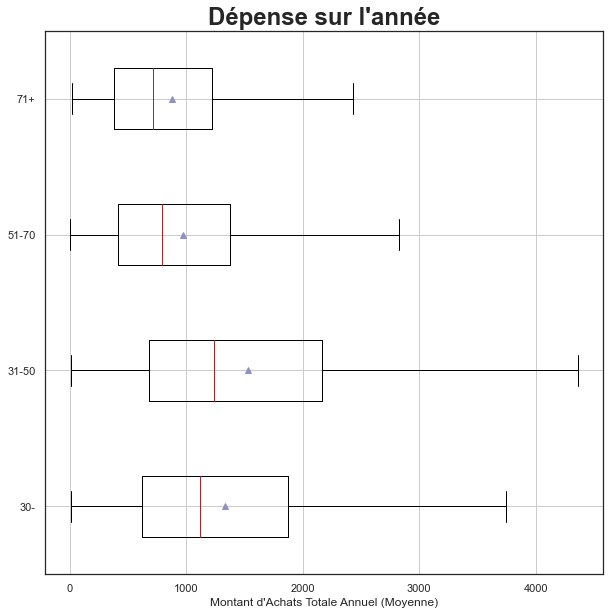

In [188]:
# 2-4-1 REPRESENTATION GRAPHIQUE?

medianprops = dict(linestyle='-', linewidth=1, color='firebrick')

plt.figure(figsize=(10,10))

plt.grid(True)

plt.boxplot([
    
    age_ranges_amount['30-'],
    
    age_ranges_amount['31-50'],
    
    age_ranges_amount['51-70'],
    
    age_ranges_amount['71+']
    
], vert=False, medianprops = medianprops, showmeans=True, showfliers=False)

plt.xlabel("Montant d'Achats Totale Annuel (Moyenne)")

plt.yticks([1,2,3,4], ['30-', '31-50', '51-70', '71+'])

plt.title('Dépense sur l\'année', fontsize= 24, fontweight="bold")

plt.savefig('graph/28- CA_trg_age.png')

plt.show()

In [189]:
# 2-4-2 DETERMINONS LA SIGNIFICATIVITE TOTALE DU MODELE DE REGRESSION.

f, p = stats.f_oneway(
    age_ranges_amount['30-'],
    age_ranges_amount['31-50'],
    age_ranges_amount['51-70'],
    age_ranges_amount['71+']
)

print(f'La f-valeur Vaut {f:.2f} et la p-valeur Vaut {p:.2e}.')

La f-valeur Vaut 220.97 et la p-valeur Vaut 4.29e-138.


In [190]:
# 2-4-3 DETERMINONS LE COEFFICIENT DE CORRELATION ETA = SCE/SCT.

def eta2(df, quant, qual):
    # on créé un array qui contient les valeurs de chaques classes séparé dans des sous array
    class_valeurs = []
    for c in  df[quant].unique():
        class_valeurs.append(df.loc[df[quant]==c, qual].values)
    
    # on calcule eta2
    y =  np.concatenate(class_valeurs)
    moyenne_y = y.mean()

    class_info = []
    for y_i in class_valeurs:
        class_info.append({
            'n_i': len(y_i),
            'moyenne_i': y_i.mean()
        })
        
    SCE = sum([ c['n_i'] * (c['moyenne_i'] - moyenne_y)**2 for c in class_info])
    SCT = sum([(y_ij - moyenne_y)**2 for y_ij in y])
    
    return SCE / SCT

In [191]:
# 2-4-4 LE COEFFICIENT DE CORRELATION ETA.

eta2(df, 'c_age_range', 'amount')

0.07162745569368484

In [192]:
# TEST DE COMPARAISON DES VARIANCES: ANOVA.

# Ordinary Least Squares (OLS) model

model = ols('amount ~ C(c_age_range)', data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(c_age_range),5.607956e+08,3.0,220.96844,4.287146e-138
Residual,7.268543e+09,8592.0,NaN,NaN


In [193]:
# LA TABLE ANOVA EN UTILISANT bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)

res = stat()

res.anova_stat(df=df, res_var='amount', anova_model='amount ~ C(c_age_range)')

res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(c_age_range),3.0,5.607956e+08,1.869319e+08,220.96844,4.287146e-138
Residual,8592.0,7.268543e+09,8.459663e+05,NaN,NaN


In [194]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test

# check documentation here https://github.com/reneshbedre/bioinfokit

# perform multiple pairwise comparison (Tukey's HSD)

# unequal sample size data, tukey_hsd uses Tukey-Kramer test

res = stat()

res.tukey_hsd(df=df, res_var='amount', xfac_var='c_age_range', anova_model='amount ~ C(c_age_range)')

res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,51-70,31-50,560.428194,497.888270,622.968118,32.563431,0.001000
1,51-70,71+,94.554628,-9.750310,198.859566,3.294166,0.091413
2,51-70,30-,359.644205,289.226930,430.061480,18.559291,0.001000
3,31-50,71+,654.982822,553.769179,756.196465,23.515726,0.001000
4,31-50,30-,200.783989,135.032380,266.535598,11.096608,0.001000
5,71+,30-,454.198833,347.937117,560.460548,15.532334,0.001000


In [195]:
import statsmodels.api
result = statsmodels.formula.api.ols('amount ~ C(c_age_range)', data=df).fit()
table  = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(c_age_range),3.0,5.607956e+08,1.869319e+08,220.96844,4.287146e-138
Residual,8592.0,7.268543e+09,8.459663e+05,NaN,NaN


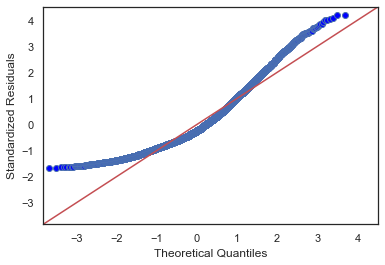

In [196]:
# POUR QUE LE TEST ANOVA SOIT VALIDE,IL FAUT QUE: TESTS STATISTIQUES DE SHAPIRO-WILKS, BARTLETT, LEVENE ET D'APPROCHES VISUELLES (QQ-PLOT ET HISTOGRAMME). 

# APPROCHE VISUELLE

# # QQ-plot: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)

sm.qqplot(res.anova_std_residuals, line='45')

plt.xlabel("Theoretical Quantiles")

plt.ylabel("Standardized Residuals")

plt.savefig('graph/40- Dépense_trg_age.png')
plt.show()

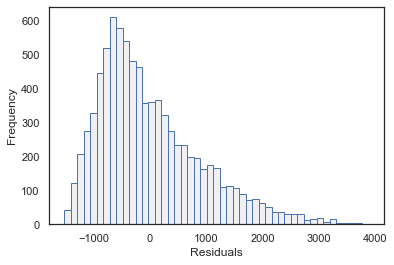

In [197]:
# HISTOGRAMME

plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='b') 

plt.xlabel("Residuals")

plt.ylabel('Frequency')
plt.savefig('graph/41- Dépense_trg_age.png')
plt.show()

In [198]:
# a-TEST DE SHAPIRO-WILKS:LES RESIDUS DU TEST ANOVA DOIVENT ETRE APPROXIMATIVEMENT NORMALEMENT DISTRIBUES.

res  = model.resid

w, pvalue = stats.shapiro(model.resid)

# REJETER H0 SI pvalue < 5% (0.05) 

print(w, pvalue)

0.9301491975784302 0.0


C:\Users\yebel\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [199]:
# b- TEST DE JARQUE-BERA

stats.jarque_bera(model.resid)

Jarque_beraResult(statistic=1724.0459181913363, pvalue=0.0)

In [200]:
# c-HOMOSCEDASTICITE OU HOMOGENEITE DES VARIANCE (VARIANCES DES POPULATIONS DONT PROVIENNENT LES ECHANTILLONS SONT EGALES ENTRE ELLES)
    # TEST DE LEVENE OU BARTLETT. age_ranges_amount

# TESTE DE BARTLETT No1

w, pvalue = stats.bartlett(age_ranges_amount['30-'], age_ranges_amount['31-50'], age_ranges_amount['51-70'], age_ranges_amount['71+'])

print(w, pvalue)

600.6686196448766 7.218471944519567e-130


In [201]:
# TEST DE BARTLETT No2 if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test

res = stat()

res.bartlett(df=df, res_var='amount', xfac_var='c_age_range')

res.bartlett_summary

,Parameter,Value
0,Test statistics (T),600.6686
1,Degrees of freedom (Df),3.0000
2,p value,0.0000


In [202]:
# TEST DE LEVENE No1. age_ranges_amoun; if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test

res = stat()

res.levene(df=df, res_var='amount', xfac_var='c_age_range')

res.levene_summary

,Parameter,Value
0,Test statistics (W),130.2544
1,Degrees of freedom (Df),3.0000
2,p value,0.0000


In [203]:
# TEST ANOVA NON PARAMETRIQUE.age_ranges_amount

groupe1 = age_ranges_amount['30-']
groupe2 = age_ranges_amount['31-50']
groupe3 = age_ranges_amount['51-70']
groupe4 = age_ranges_amount['71+']

#TEST No2 DE LEVENE CENTRE SUR LA MEDIANE.

stats.levene(groupe1,groupe2, groupe3, groupe4, center='median')

LeveneResult(statistic=130.25443333467862, pvalue=1.618787813202012e-82)

In [204]:
#TEST NON PARAMETRIQUE DE WELCH (réaliser l'ANOVA de Welch)

pg. welch_anova (dv='amount', between='c_age_range', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,c_age_range,3,2835.185324,258.215821,3.812922e-148,0.071627


In [205]:
# TEST POST-HOC NON PARAMETRIQUE DE GAMES-HOWELL

pg.pairwise_gameshowell(dv='amount', between='c_age_range', data=df)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,30-,31-50,1334.182577,1534.966566,-200.783989,27.505886,-7.299673,4880.548630,0.001000,-0.203059
1,30-,51-70,1334.182577,974.538372,359.644205,24.959687,14.409003,3853.945330,0.001000,0.429252
2,30-,71+,1334.182577,879.983744,454.198833,32.261159,14.078813,1580.200572,0.001000,0.632841
3,31-50,51-70,1534.966566,974.538372,560.428194,23.396182,23.953831,5825.200199,0.001000,0.633793
4,31-50,71+,1534.966566,879.983744,654.982822,31.067309,21.082702,1464.196537,0.001000,0.902726
5,51-70,71+,974.538372,879.983744,94.554628,28.837300,3.278900,1116.013077,0.005912,0.144677


In [206]:
# c- INDEPENDANCE -->
#i)Les observations dans chaque groupe sont indépendantes des observations dans tous les autres groupes.
#ii)Les observations au sein de chaque groupe ont été obtenues par un échantillon aléatoire.

# d-La variable dépendante doit être continue .

# RQ: Si CES HYPOTHESES SONT VIOLEES, PROCEDER AUX TESTS NON PARAMETRIQUES(par exemple , test U de Mann-Whitney , test de Kruskal-Wallis ).

In [207]:
# 3-ANALYSONS LA CORRELATION ENTRE L'AGE DES CLIENTS ET LA FREQUENCE D'ACHATS (IE NOMBRE D'ACHATS PAR MOIS PAR EXEMPLE)

df = t_ss_c_ab[['c_id', 'c_age', 'c_age_range', 't_month', 'p_id']]

# 3-1 SUPPRISSION DES AGES (METTONS DE COTE LES AGES).

c_ages = df[['c_id', 'c_age', 'c_age_range']].drop_duplicates()

# 3-2 AGREGATION DES ACHATS.

nb_achats = df[['c_id', 't_month', 'p_id']]

# 3-3 DECOMPTE DU NOMBRE D'ACHATS MENSUEL (PAR MOIS).

nb_achats = nb_achats.groupby(['c_id', 't_month']).agg({'p_id': 'count'}).reset_index()

# 3-4 COLONNES RELATIVES AU NOMBRE D'ACHATS MENSUEL.

nb_achats.columns = ['c_id', 't_month', 'total_achat']

# 3-5 DETERMINONS LA MOYENNE DU NOMBRE D'ACHATS MENSUEL.

nb_achats = nb_achats.groupby('c_id').agg({'total_achat': 'mean'}).reset_index()

# 3-6 COLONNES RELATIVES AU NOMBRE D'ACHATS MENSUEL.

nb_achats.columns = ['c_id', 'nb_achat_mois_moy']

# 3-7 JOINTURE ENTRE L'AGE DU CLIENT (c_ages) ET LA MOYENNE DU NOMBRE DE SES ACHATS MENSUEL (nb_achats).

df2 = pd.merge(c_ages, nb_achats, on='c_id')

df2.sample()

,c_id,c_age,c_age_range,nb_achat_mois_moy
3264,c_2468,44.0,31-50,12.0


In [208]:
# 3-8 AVEC L'AGE SOUS FORME QUANTITATIVE.

df3 = df2.groupby('c_age').agg({'nb_achat_mois_moy': 'mean'}).reset_index()

df3

,c_age,nb_achat_mois_moy
0,19.0,3.680132
1,20.0,3.338024
2,21.0,3.415466
3,22.0,3.643920
4,23.0,3.618719
...,...,...
71,90.0,4.253788
72,91.0,4.806145
73,92.0,4.374053
74,93.0,5.050000


In [209]:
# 3-9 EFFECTUONS LA REGRESSION LINEAIRE.

# 3-9-1 X : LA VARIABLE EXPLICATIVE(INPUTS); y : LA VARIABLE EXPLIQUEE (RESULTAT: SORTIE)

X = df3.c_age.values

y = df3.nb_achat_mois_moy.values

# 3-9-2 CREATION DU MODELE.

X_sm =  sm.add_constant(X)

model = sm.OLS(y, X_sm).fit()

# 3-9-3 CALCUL DU COEFFICIENT DE DETERMINETION ET DE LA PLUS-VALUE.

rsquare = model.rsquared

pval = model.pvalues[0]

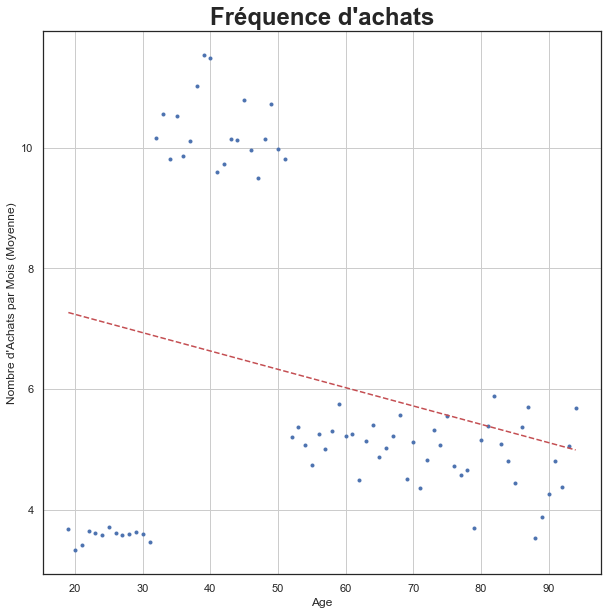

R-carré=0.07 & p-valeur=0.00


In [210]:
# 3-9-4 REPRESENTATION GRAPHIQUE.

plt.figure(figsize=(10,10))

plt.grid(True)

plt.plot(X, y, 'b.')

plt.plot(X, model.predict(X_sm), 'r--')

plt.xlabel('Age')

plt.ylabel("Nombre d'Achats par Mois (Moyenne)")

plt.plot()

plt.title('Fréquence d\'achats', fontsize= 24, fontweight="bold")

plt.savefig('graph/29- CA_trg_age.png')

plt.show()

print(f"R-carré={rsquare:.2f} & p-valeur={pval:.2f}")

In [211]:
# 3-10 PRENONS L'AGE SOUS FORME QUALITATIVE.'30-':4; '31-50':10; '51-70': 6; '71+':5 

age_ranges_nb_achat_mois = {age_range: df2.loc[df2.c_age_range==age_range, 'nb_achat_mois_moy'] for age_range in age_ranges}

age_ranges_nb_achat_mois['71+'].mean()

4.8861298434487965

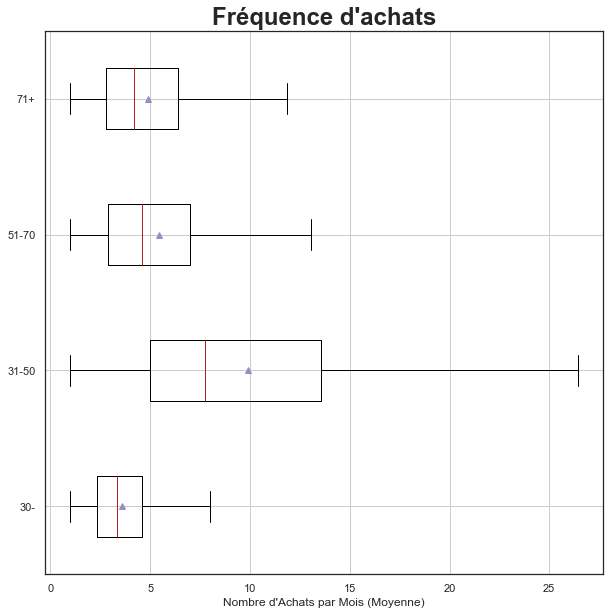

In [212]:
# 3-10-1 REPRESENTATION GRAPHIQUE.

medianprops = dict(linestyle='-', linewidth=1, color='firebrick')

plt.figure(figsize=(10,10))

plt.grid(True)

plt.boxplot([
    
    age_ranges_nb_achat_mois['30-'],
    
    age_ranges_nb_achat_mois['31-50'],
    
    age_ranges_nb_achat_mois['51-70'],
    
    age_ranges_nb_achat_mois['71+']
    
], vert=False, medianprops=medianprops, showmeans=True, showfliers=False)

plt.xlabel("Nombre d'Achats par Mois (Moyenne)")

plt.yticks([1,2,3,4], ['30-', '31-50', '51-70', '71+'])

plt.title('Fréquence d\'achats', fontsize= 24, fontweight="bold")

plt.savefig('graph/30- CA_trg_age.png')

plt.show()

In [243]:
# 3-10-2 DETERMINONS LES INDICATEURS STATISTIQUES DE LA SIGNIFICATIVITE GLOBALE DU MODELE: F-STAT ET P-VALUE.

f, p = stats.f_oneway(
    
    age_ranges_nb_achat_mois['30-'],
    
    #age_ranges_nb_achat_mois['31-50'],
    
    age_ranges_nb_achat_mois['51-70'],
    
    age_ranges_nb_achat_mois['71+']
    
)

print(f'La f-valeur Vaut {f:.2f} et La p-valeur Vaut {p}.')

La f-valeur Vaut 250.40 et La p-valeur Vaut 1.5486637907061088e-104.


In [214]:
# 3-10-3 LE COEFFICIENT DE CORRELATION ETA.

eta2(df2, 'c_age_range', 'nb_achat_mois_moy')

0.24877636273858583

In [215]:
# TEST DE COMPARAISON DES VARIANCES: ANOVA.

# Ordinary Least Squares (OLS) model

model2 = ols('nb_achat_mois_moy ~ C(c_age_range)', data=df2).fit()

anova_table = sm.stats.anova_lm(model2, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(c_age_range),61369.373418,3.0,948.446598,0.0
Residual,185315.531621,8592.0,NaN,NaN


In [216]:
# LA TABLE ANOVA EN UTILISANT bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)

res = stat()

res.anova_stat(df=df2, res_var='nb_achat_mois_moy', anova_model='nb_achat_mois_moy ~ C(c_age_range)')

res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(c_age_range),3.0,61369.373418,20456.457806,948.446598,0.0
Residual,8592.0,185315.531621,21.568381,NaN,NaN


In [217]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test

# check documentation here https://github.com/reneshbedre/bioinfokit

# perform multiple pairwise comparison (Tukey's HSD)

# unequal sample size data, tukey_hsd uses Tukey-Kramer test

res = stat()

res.tukey_hsd(df=df2, res_var='nb_achat_mois_moy', xfac_var='c_age_range', anova_model='nb_achat_mois_moy ~ C(c_age_range)')

res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,31-50,71+,5.025216,4.514157,5.536276,35.731479,0.001000
1,31-50,51-70,4.491153,4.175369,4.806936,51.681576,0.001000
2,31-50,30-,6.315834,5.983834,6.647835,69.128899,0.001000
3,71+,51-70,0.534064,0.007396,1.060732,3.684881,0.045417
4,71+,30-,1.290618,0.754070,1.827167,8.740902,0.001000
5,51-70,30-,1.824682,1.469123,2.180241,18.648472,0.001000


In [218]:
import statsmodels.api
result = statsmodels.formula.api.ols('nb_achat_mois_moy ~ C(c_age_range)', data=df2).fit()
table  = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(c_age_range),3.0,61369.373418,20456.457806,948.446598,0.0
Residual,8592.0,185315.531621,21.568381,NaN,NaN


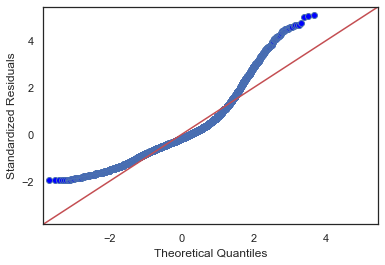

In [219]:
# POUR QUE LE TEST ANOVA SOIT VALIDE,IL FAUT QUE: TESTS STATISTIQUES DE SHAPIRO-WILKS, BARTLETT, LEVENE ET D'APPROCHES VISUELLES (QQ-PLOT ET HISTOGRAMME). 

# APPROCHE VISUELLE

# # QQ-plot: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)

sm.qqplot(res.anova_std_residuals, line='45')

plt.xlabel("Theoretical Quantiles")

plt.ylabel("Standardized Residuals")

plt.savefig('graph/42- Fqc_achat_trg_age.png')

plt.show()

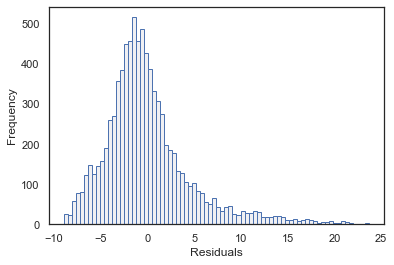

In [220]:
# HISTOGRAMME

plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='b') 

plt.xlabel("Residuals")

plt.ylabel('Frequency')

plt.savefig('graph/43- Fqce_achat_trg_age.png')
plt.show()

In [221]:
# a-TEST DE SHAPIRO-WILKS:LES RESIDUS DU TEST ANOVA DOIVENT ETRE APPROXIMATIVEMENT NORMALEMENT DISTRIBUES.

res  = model2.resid

w, pvalue = stats.shapiro(model2.resid)

# REJETER H0 SI pvalue < 5% (0.05) 

print(w, pvalue)

0.9039511680603027 0.0


C:\Users\yebel\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [222]:
# b- TEST DE JARQUE-BERA

stats.jarque_bera(model2.resid)

Jarque_beraResult(statistic=6416.787625536067, pvalue=0.0)

In [223]:
# c-HOMOSCEDASTICITE OU HOMOGENEITE DES VARIANCE (VARIANCES DES POPULATIONS DONT PROVIENNENT LES ECHANTILLONS SONT EGALES ENTRE ELLES)
    # TEST DE LEVENE OU BARTLETT. age_ranges_amount

# TESTE DE BARTLETT No1

w, pvalue = stats.bartlett(age_ranges_nb_achat_mois['30-'], age_ranges_nb_achat_mois['31-50'], age_ranges_nb_achat_mois['51-70'], age_ranges_nb_achat_mois['71+'])

print(w, pvalue)

4152.2936381411755 0.0


In [224]:
# TEST DE BARTLETT No2 if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test

res = stat()

res.bartlett(df=df2, res_var='nb_achat_mois_moy', xfac_var='c_age_range')

res.bartlett_summary

,Parameter,Value
0,Test statistics (T),4152.2936
1,Degrees of freedom (Df),3.0000
2,p value,0.0000


In [225]:
# TEST DE LEVENE No1. age_ranges_amoun; if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test

res = stat()

res.levene(df=df2, res_var='nb_achat_mois_moy', xfac_var='c_age_range')

res.levene_summary

,Parameter,Value
0,Test statistics (W),597.6343
1,Degrees of freedom (Df),3.0000
2,p value,0.0000


In [226]:
# TEST ANOVA NON PARAMETRIQUE.age_ranges_amount

groupe1 = age_ranges_nb_achat_mois['30-']
groupe2 = age_ranges_nb_achat_mois['31-50']
groupe3 = age_ranges_nb_achat_mois['51-70']
groupe4 = age_ranges_nb_achat_mois['71+']

#TEST No2 DE LEVENE CENTRE SUR LA MEDIANE.

stats.levene(groupe1,groupe2, groupe3, groupe4, center='median')

LeveneResult(statistic=597.6343002153548, pvalue=0.0)

In [227]:
#TEST NON PARAMETRIQUE DE WELC (réaliser l'ANOVA de Welch)

pg. welch_anova (dv='nb_achat_mois_moy', between='c_age_range', data=df2)

,Source,ddof1,ddof2,F,p-unc,np2
0,c_age_range,3,2621.775687,1051.115299,0.0,0.248776


In [228]:
# TEST POST-HOC NON PARAMETRIQUE DE GAMES-HOWELL

pg.pairwise_gameshowell(dv='nb_achat_mois_moy', between='c_age_range', data=df2)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,30-,31-50,3.595512,9.911346,-6.315834,0.117673,-53.672569,4075.228026,0.001,-1.493036
1,30-,51-70,3.595512,5.420194,-1.824682,0.077678,-23.490357,3654.753107,0.001,-0.699790
2,30-,71+,3.595512,4.886130,-1.290618,0.116325,-11.094919,789.116768,0.001,-0.498715
3,31-50,51-70,9.911346,5.420194,4.491153,0.131528,34.146006,5401.173948,0.001,0.903468
4,31-50,71+,9.911346,4.886130,5.025216,0.157471,31.911910,2216.011635,0.001,1.366415
5,51-70,71+,5.420194,4.886130,0.534064,0.130323,4.097999,1199.944603,0.001,0.180818


In [229]:
# 4- ANALYSONS LA CORRELATION ENTRE L'AGE DES CLIENTS ET LA TAILLE DU PREMIER PANIER. 

# 4-1 INFORMATION RELATIVES AUX CLIENTS SPECIAUX (ABERRANTS)

df = t_ss_c_ab[['c_id', 'c_age', 'c_age_range', 't_sess_id', 'p_id']]

# 4-2 SUPPRISSION DES AGES (METTONS DE COTE LES AGES).

c_ages = df[['c_id', 'c_age', 'c_age_range']].drop_duplicates()

# 4-3 INFORMATION RELATIVE AU PANIER MOYEN.

panier_moy = df[['c_id', 't_sess_id', 'p_id']]

# 4-4 DECOMPTE DU NOMBRE D'ARTICLES ACHETES PAR MOIS.

panier_moy = panier_moy.groupby(['c_id', 't_sess_id']).count().reset_index()

# 4-5 COLONNES DU PANIER MOYEN.

panier_moy.columns = ['c_id', 't_sess_id', 'nb_prods']

# 4-6 DETREMINONS LA MOYENNE MENSUELLE DU PANIER MOYEN.

panier_moy = panier_moy.groupby('c_id').agg({'nb_prods': 'mean'}).reset_index()

# 4-7 NOUVELLES COLONNES DE LA MOYENNE DU PANIER MOYEN.

panier_moy.columns = ['c_id', 'panier_moy']

# 4-8 JOINTURE ENTRE L'AGE DU CLIENT (c_ages) ET LA MOYENNE MENSUELLE DU PANIER MOYEN (panier_moy).

df2 = pd.merge(c_ages, panier_moy, on='c_id')

df2.sample()

,c_id,c_age,c_age_range,panier_moy
4208,c_2578,62.0,51-70,1.25


In [230]:
# 4-9 PRENONS EN COMPTE L'AGE SOUS FORME QUANTTITATIVE.

df3 = df2.groupby('c_age').agg({'panier_moy': 'mean'}).reset_index()

df3

,c_age,panier_moy
0,19.0,1.819899
1,20.0,1.760903
2,21.0,1.777830
3,22.0,1.798059
4,23.0,1.916465
...,...,...
71,90.0,1.708906
72,91.0,1.619075
73,92.0,1.880499
74,93.0,1.260473


In [231]:
# 4-9-1 EFFECTUONS LA REGRESSION LINEAIRE.

# 4-9-1-1 X : LA VARIABLE EXPLICATIVE(INPUTS); y : LA VARIABLE EXPLIQUEE (RESULTAT: SORTIE)

X = df3.c_age.values

y = df3.panier_moy.values

# 4-9-1-2 CREATION DU MODELE.

X_sm =  sm.add_constant(X)

model = sm.OLS(y, X_sm).fit()

# 4-9-1-3 CALCUL DU COEFFICIENT DE DETERMINETION ET DE LA PLUS-VALUE.

rsquare = model.rsquared

pval = model.pvalues[0]

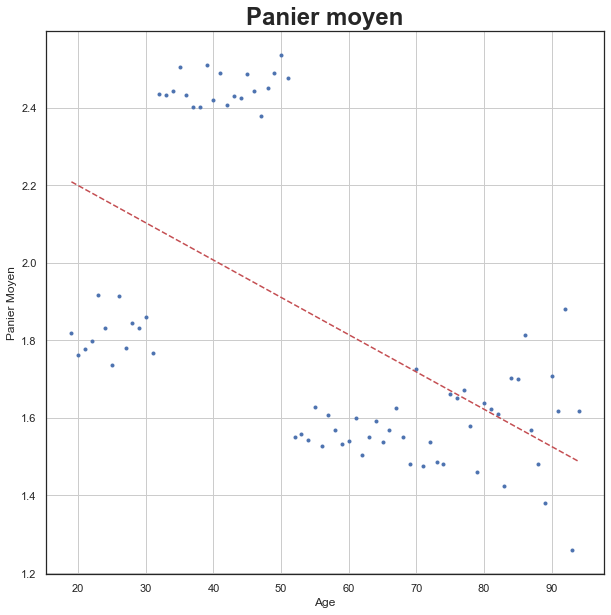

R-carré=0.31 & p-valeur=0.00


In [232]:
# 4-9-2 REPRESENTATION GRAPHIQUE.

plt.figure(figsize=(10,10))

plt.grid(True)

plt.plot(X, y, 'b.')

plt.plot(X, model.predict(X_sm), 'r--')

plt.xlabel('Age')

plt.ylabel("Panier Moyen")

plt.plot()

plt.title('Panier moyen', fontsize= 24, fontweight="bold")

plt.savefig('graph/31- Age_qnt_clt_tpp.png')

plt.show()

print(f"R-carré={rsquare:.2f} & p-valeur={pval:.2f}")

In [233]:
# 4-10 PRENONS L'AGE SOUS FORME QUALITATIVE. '30-':1.822; '31-50': 2.41; '51-70':1.62; '71+': 1.57

age_ranges_panier_moy = {age_range: df2.loc[df2.c_age_range==age_range, 'panier_moy'] for age_range in age_ranges}

age_ranges_panier_moy['30-'].mean()

1.8224432742356582

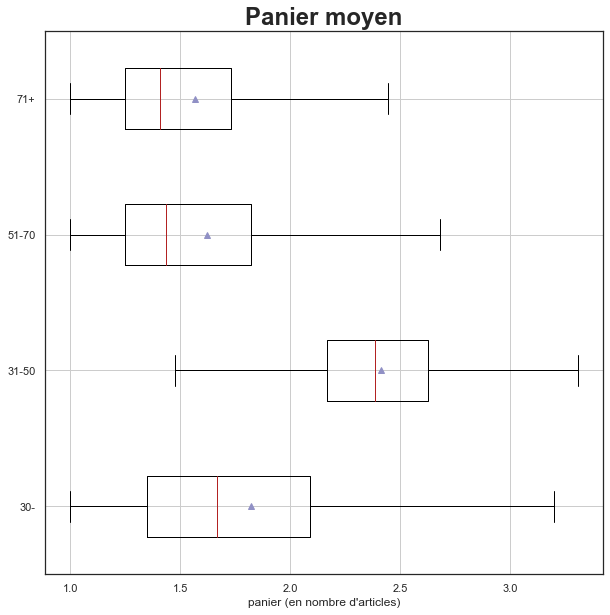

In [234]:
# 4-10-1 REPRESENTATION GRAPHIQUE.

medianprops = dict(linestyle='-', linewidth=1, color='firebrick')

plt.figure(figsize=(10,10))

plt.grid(True)

plt.boxplot([
    
    age_ranges_panier_moy['30-'],
    
    age_ranges_panier_moy['31-50'],
    
    age_ranges_panier_moy['51-70'],
    
    age_ranges_panier_moy['71+']
    
], vert=False, medianprops=medianprops, showmeans=True, showfliers=False)

plt.xlabel("panier (en nombre d'articles)")

plt.yticks([1,2,3,4], ['30-', '31-50', '51-70', '71+'])

plt.title('Panier moyen', fontsize= 24, fontweight="bold")

plt.savefig('graph/31- Age_qlt_clt_tpp.png')

plt.show()

In [235]:
# 4-10-2 DETERMINONS LES INDICATEURS STATISTIQUES DE LA SIGNIFICATIVITE GLOBALE DU MODELE: F-STAT ET P-VALUE.

f, p = stats.f_oneway(
    
    age_ranges_amount['30-'],
    #age_ranges_panier_moy['30-'],
    age_ranges_amount['31-50'],
    #age_ranges_panier_moy['31-50'],
    age_ranges_amount['51-70'],
    #age_ranges_panier_moy['51-70'],
    age_ranges_amount['71+']
    #age_ranges_panier_moy['71+']
)

print(f'La f-valeur vaut {f:.2f} et la p-valeur vaut {p:.2e}.')

La f-valeur vaut 220.97 et la p-valeur vaut 4.29e-138.


In [236]:
# 4-10-3 LE COEFFICIENT DE CORRELATION ETA.

eta2(df2, 'c_age_range', 'panier_moy')

0.292390093759998

In [237]:
# TEST DE COMPARAISON DES VARIANCES: ANOVA.

# Ordinary Least Squares (OLS) model

model3 = ols('panier_moy ~ C(c_age_range)', data=df2).fit()

anova_table = sm.stats.anova_lm(model3, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(c_age_range),1112.589438,3.0,1183.427791,0.0
Residual,2692.564916,8592.0,NaN,NaN


In [238]:
# LA TABLE ANOVA EN UTILISANT bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)

res = stat()

res.anova_stat(df=df2, res_var='panier_moy', anova_model='panier_moy ~ C(c_age_range)')

res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(c_age_range),3.0,1112.589438,370.863146,1183.427791,0.0
Residual,8592.0,2692.564916,0.313380,NaN,NaN


In [239]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test

# check documentation here https://github.com/reneshbedre/bioinfokit

# perform multiple pairwise comparison (Tukey's HSD)

# unequal sample size data, tukey_hsd uses Tukey-Kramer test

res = stat()

res.tukey_hsd(df=df2, res_var='panier_moy', xfac_var='c_age_range', anova_model='panier_moy ~ C(c_age_range)')

res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,31-50,71+,0.844264,0.782662,0.905867,49.802085,0.001000
1,31-50,51-70,0.789693,0.751629,0.827757,75.389184,0.001000
2,31-50,30-,0.589409,0.549390,0.629428,53.520279,0.001000
3,71+,51-70,0.054571,-0.008913,0.118055,3.123694,0.121062
4,71+,30-,0.254856,0.190181,0.319531,14.319419,0.001000
5,51-70,30-,0.200284,0.157425,0.243143,16.981478,0.001000


In [240]:
import statsmodels.api
result = statsmodels.formula.api.ols('panier_moy ~ C(c_age_range)', data=df2).fit()
table  = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(c_age_range),3.0,1112.589438,370.863146,1183.427791,0.0
Residual,8592.0,2692.564916,0.313380,NaN,NaN


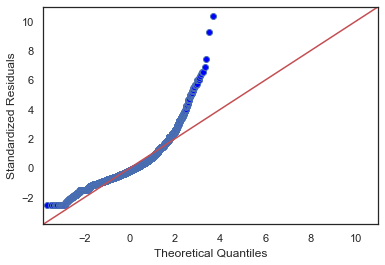

In [241]:
# POUR QUE LE TEST ANOVA SOIT VALIDE,IL FAUT QUE: TESTS STATISTIQUES DE SHAPIRO-WILKS, BARTLETT, LEVENE ET D'APPROCHES VISUELLES (QQ-PLOT ET HISTOGRAMME). 

# APPROCHE VISUELLE

# # QQ-plot: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)

sm.qqplot(res.anova_std_residuals, line='45')

plt.xlabel("Theoretical Quantiles")

plt.ylabel("Standardized Residuals")

plt.savefig('graph/44- PanierM_trg_age.png')
plt.show()

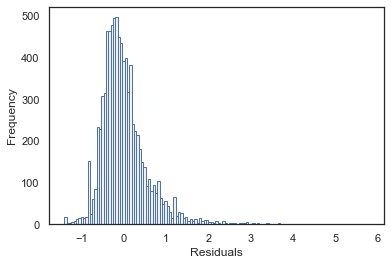

In [242]:
# HISTOGRAMME

plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='b') 

plt.xlabel("Residuals")

plt.ylabel('Frequency')

plt.savefig('graph/45- PanierM_trg_age.png')
plt.show()

In [156]:
# a-TEST DE SHAPIRO-WILKS:LES RESIDUS DU TEST ANOVA DOIVENT ETRE APPROXIMATIVEMENT NORMALEMENT DISTRIBUES.

res  = model3.resid

w, pvalue = stats.shapiro(model3.resid)

# REJETER H0 SI pvalue < 5% (0.05) 

print(w, pvalue)

0.8850915431976318 0.0


C:\Users\yebel\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [157]:
# b- TEST DE JARQUE-BERA

stats.jarque_bera(model3.resid)

Jarque_beraResult(statistic=24619.096843216448, pvalue=0.0)

In [158]:
# c-HOMOSCEDASTICITE OU HOMOGENEITE DES VARIANCE (VARIANCES DES POPULATIONS DONT PROVIENNENT LES ECHANTILLONS SONT EGALES ENTRE ELLES)
    # TEST DE LEVENE OU BARTLETT. age_ranges_amount

# TESTE DE BARTLETT No1

w, pvalue = stats.bartlett(age_ranges_panier_moy['30-'], age_ranges_panier_moy['31-50'], age_ranges_panier_moy['51-70'], age_ranges_panier_moy['71+'])

print(w, pvalue)

353.9095642784799 2.123844698215073e-76


In [159]:
# TEST DE BARTLETT No2 if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test

res = stat()

res.bartlett(df=df2, res_var='panier_moy', xfac_var='c_age_range')

res.bartlett_summary

,Parameter,Value
0,Test statistics (T),353.9096
1,Degrees of freedom (Df),3.0000
2,p value,0.0000


In [160]:
# TEST DE LEVENE No1. age_ranges_amoun; if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test

res = stat()

res.levene(df=df2, res_var='panier_moy', xfac_var='c_age_range')

res.levene_summary

,Parameter,Value
0,Test statistics (W),54.8029
1,Degrees of freedom (Df),3.0000
2,p value,0.0000


In [161]:
# TEST ANOVA NON PARAMETRIQUE.age_ranges_amount

groupe1 = age_ranges_panier_moy['30-']
groupe2 = age_ranges_panier_moy['31-50']
groupe3 = age_ranges_panier_moy['51-70']
groupe4 = age_ranges_panier_moy['71+']

#TEST No2 DE LEVENE CENTRE SUR LA MEDIANE.

stats.levene(groupe1,groupe2, groupe3, groupe4, center='median')

LeveneResult(statistic=54.802866666311864, pvalue=4.414093773324299e-35)

In [162]:
#TEST NON PARAMETRIQUE DE WELC (réaliser l'ANOVA de Welch)

pg. welch_anova (dv='panier_moy', between='c_age_range', data=df2)

,Source,ddof1,ddof2,F,p-unc,np2
0,c_age_range,3,2598.948054,1398.314017,0.0,0.29239


In [163]:
# TEST POST-HOC NON PARAMETRIQUE DE GAMES-HOWELL

pg.pairwise_gameshowell(dv='panier_moy', between='c_age_range', data=df2)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,30-,31-50,1.822443,2.411852,-0.589409,0.017021,-34.628333,3334.599399,0.001000,-0.963273
1,30-,51-70,1.822443,1.622159,0.200284,0.018812,10.646517,4058.099343,0.001000,0.317165
2,30-,71+,1.822443,1.567588,0.254856,0.024494,10.404668,1478.192909,0.001000,0.467688
3,31-50,51-70,2.411852,1.622159,0.789693,0.014080,56.087791,4718.933100,0.001000,1.484025
4,31-50,71+,2.411852,1.567588,0.844264,0.021079,40.053039,893.330056,0.001000,1.715004
5,51-70,71+,1.622159,1.567588,0.054571,0.022550,2.420040,1140.686086,0.074023,0.106781


In [164]:
# 5-ANALYSONS LA CORRELATION ENTRE L'AGE DES CLIENTS ET LES CATEGORIES DE PRODUITS ACHETES.

# 5-1 DUREE DES SESSION DES CLIENTS ABBERANTS.

df = t_ss_c_ab

df

,p_id,p_price,p_price_range,p_cat,c_id,c_sex,c_birth,c_age,c_age_range,t_date,...,t_year,t_month,t_month_part,t_day_week,t_day,t_day_week_num,t_hour,t_buyer_age,t_buyer_age_range,data_info
0,0_1518,4.18,cheap 4-9,0,c_103,f,1986.0,37.0,31-50,2022-05-20 13:21:29.043970,...,2022.0,5.0,2,Friday,20.0,4.0,13.0,36.0,31-50,NaN
1,0_1518,4.18,cheap 4-9,0,c_103,f,1986.0,37.0,31-50,2021-07-20 13:21:29.043970,...,2021.0,7.0,2,Tuesday,20.0,1.0,13.0,35.0,31-50,NaN
2,0_1518,4.18,cheap 4-9,0,c_103,f,1986.0,37.0,31-50,2022-08-20 13:21:29.043970,...,2022.0,8.0,2,Saturday,20.0,5.0,13.0,36.0,31-50,NaN
12,0_1518,4.18,cheap 4-9,0,c_7456,f,1985.0,38.0,31-50,2022-05-27 12:41:28.779302,...,2022.0,5.0,3,Friday,27.0,4.0,12.0,37.0,31-50,NaN
13,0_1518,4.18,cheap 4-9,0,c_7456,f,1985.0,38.0,31-50,2021-11-27 12:41:28.779302,...,2021.0,11.0,3,Saturday,27.0,5.0,12.0,36.0,31-50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,1_408,35.24,expensive 20-79,1,c_7402,m,1945.0,78.0,71+,2023-01-26 06:52:02.225335,...,2023.0,1.0,2,Thursday,26.0,3.0,6.0,78.0,71+,NaN
679328,1_408,35.24,expensive 20-79,1,c_7402,m,1945.0,78.0,71+,2022-11-26 06:52:02.225335,...,2022.0,11.0,3,Saturday,26.0,5.0,6.0,77.0,71+,NaN
679329,1_408,35.24,expensive 20-79,1,c_7402,m,1945.0,78.0,71+,2021-09-26 06:52:02.225335,...,2021.0,9.0,3,Sunday,26.0,6.0,6.0,76.0,71+,NaN
679330,2_81,86.99,very_expansive 80+,2,c_7616,m,1993.0,30.0,30-,2022-02-19 14:51:58.078656,...,2022.0,2.0,2,Saturday,19.0,5.0,14.0,29.0,30-,NaN


In [165]:
# 5-2 CATEGORIES DES CLIENTS ABERRANTS.

cats = t_ss_c_ab.p_cat.unique()
cats

array([0, 1, 2], dtype=int64)

In [166]:
# 5-3 ANALYSONS LA RELATION ENTRE LA CATEGORIE DES PRODUITS ET L'AGE DES CLIENTS.

cat_ages = {cat: t_ss_c_ab.loc[t_ss_c_ab['p_cat']==cat, 't_buyer_age'] for cat in cats}

# CATEGORIE DES PRODUITS PAR TRANCHE D'AGE. '0': 43.44 ans; '1': 47.50 ans; '2': 25.65 ans

cat_ages[2].mean()

25.652764247442768

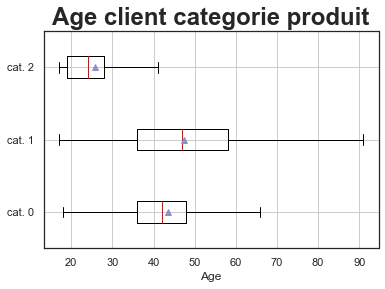

In [167]:
# 5-3-1 REPRESENTATION GRAPHIQUE DE LA RELATION ENTRE LA CATEGORIE DES PRODUITS ET L'AGE DES CLIENTS.

medianprops = dict(linestyle='-', linewidth=1, color='firebrick')

plt.grid(True)

plt.boxplot([
    
    cat_ages[0],
    
    cat_ages[1],
    
    cat_ages[2]
    
],
    
    labels=['cat. 0', 'cat. 1', 'cat. 2'],
    
    vert=False, medianprops=medianprops, showmeans=True, showfliers=False
    
)

plt.xlabel('Age')

plt.title('Age client categorie produit', fontsize= 24, fontweight="bold")

plt.savefig('graph/31- Ctg_pdt_age_clt.png')

plt.show()

In [168]:
# 5-3-2 DETERMINONS LES INDICATEURS STATISTIQUES DE LA SIGNIFICATIVITE GLOBALE DU MODELE: F-STAT ET P-VALUE.

f, p = stats.f_oneway(cat_ages[0], cat_ages[1], cat_ages[2])

print(f'La f-valeur vaut {f:.2f} et la p-valeur vaut {p}.')

La f-valeur vaut 40424.43 et la p-valeur vaut 0.0.


In [169]:
# 5-3-3 LE COEFFICIENT DE CORRELATION ETA.

eta2(df, 'c_age_range', 'p_cat')

0.2353111410662492

In [170]:
# TEST DE COMPARAISON DES VARIANCES: ANOVA.

# Ordinary Least Squares (OLS) model

model4 = ols('p_cat ~ C(c_age_range)', data=df).fit()

anova_table = sm.stats.anova_lm(model4, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(c_age_range),52133.110025,3.0,64896.908743,0.0
Residual,169416.578565,632685.0,NaN,NaN


In [171]:
# LA TABLE ANOVA EN UTILISANT bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)

res = stat()

res.anova_stat(df=df, res_var='p_cat', anova_model='p_cat ~ C(c_age_range)')

res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(c_age_range),3.0,52133.110025,17377.703342,64896.908743,0.0
Residual,632685.0,169416.578565,0.267774,NaN,NaN


In [172]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test

# check documentation here https://github.com/reneshbedre/bioinfokit

# perform multiple pairwise comparison (Tukey's HSD)

# unequal sample size data, tukey_hsd uses Tukey-Kramer test

#res = stat()

#res.tukey_hsd(df=df, res_var='p_cat', xfac_var='c_age_range', anova_model='p_cat ~ C(c_age_range)')

#res.tukey_summary

In [173]:
import statsmodels.api
result = statsmodels.formula.api.ols('p_cat ~ C(c_age_range)', data=df).fit()
table  = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(c_age_range),3.0,52133.110025,17377.703342,64896.908743,0.0
Residual,632685.0,169416.578565,0.267774,NaN,NaN


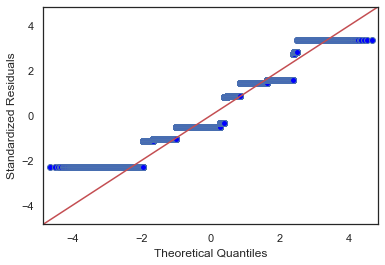

In [174]:
# POUR QUE LE TEST ANOVA SOIT VALIDE,IL FAUT QUE: TESTS STATISTIQUES DE SHAPIRO-WILKS, BARTLETT, LEVENE ET D'APPROCHES VISUELLES (QQ-PLOT ET HISTOGRAMME). 

# APPROCHE VISUELLE

# # QQ-plot: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)

sm.qqplot(res.anova_std_residuals, line='45')

plt.xlabel("Theoretical Quantiles")

plt.ylabel("Standardized Residuals")

plt.show()

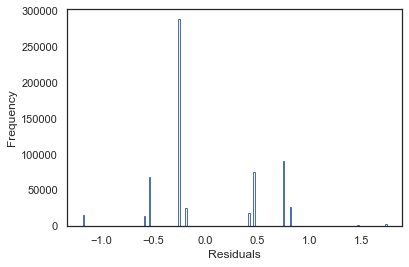

In [175]:
# HISTOGRAMME

plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='b') 

plt.xlabel("Residuals")

plt.ylabel('Frequency')

plt.show()

In [176]:
# a-TEST DE SHAPIRO-WILKS:LES RESIDUS DU TEST ANOVA DOIVENT ETRE APPROXIMATIVEMENT NORMALEMENT DISTRIBUES.

res  = model4.resid

w, pvalue = stats.shapiro(model4.resid)

# REJETER H0 SI pvalue < 5% (0.05) 

print(w, pvalue)

0.8472188711166382 0.0


C:\Users\yebel\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [177]:
# b- TEST DE JARQUE-BERA

stats.jarque_bera(model4.resid)

Jarque_beraResult(statistic=26727.34675568407, pvalue=0.0)

In [178]:
# c-HOMOSCEDASTICITE OU HOMOGENEITE DES VARIANCE (VARIANCES DES POPULATIONS DONT PROVIENNENT LES ECHANTILLONS SONT EGALES ENTRE ELLES)
    # TEST DE LEVENE OU BARTLETT. age_ranges_amount

# TESTE DE BARTLETT No1

w, pvalue = stats.bartlett(cat_ages[0], cat_ages[1], cat_ages[2])

print(w, pvalue)

32896.605207325745 0.0


In [179]:
# TEST DE BARTLETT No2 if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test

#res = stat()

#res.bartlett(df=df, res_var='p_cat', xfac_var='c_age_range')

#res.bartlett_summary

In [180]:
# TEST ANOVA NON PARAMETRIQUE.age_ranges_amount

groupe1 = cat_ages[0]
groupe2 = cat_ages[1]
groupe3 = cat_ages[2]

#TEST No2 DE LEVENE CENTRE SUR LA MEDIANE.

stats.levene(groupe1,groupe2, groupe3, center='median')

LeveneResult(statistic=24118.778542290012, pvalue=0.0)

In [181]:
#TEST NON PARAMETRIQUE DE WELC (réaliser l'ANOVA de Welch)

pg. welch_anova (dv='p_cat', between='c_age_range', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,c_age_range,3,113191.326206,39902.174994,0.0,0.235311


In [415]:
# TEST POST-HOC NON PARAMETRIQUE DE GAMES-HOWELL

pg.pairwise_gameshowell(dv='p_cat', between='c_age_range', data=df)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,30-,31-50,1.175450,0.257229,0.918221,0.003028,303.213977,77834.924669,0.001,1.254997
1,30-,51-70,1.175450,0.539280,0.636169,0.003231,196.866340,98914.068825,0.001,0.910247
2,30-,71+,1.175450,0.576661,0.598788,0.004034,148.438637,94878.239530,0.001,0.981903
3,31-50,51-70,0.257229,0.539280,-0.282052,0.001539,-183.218158,238900.591964,0.001,-0.563509
4,31-50,71+,0.257229,0.576661,-0.319433,0.002864,-111.551746,39275.212358,0.001,-0.629433
5,51-70,71+,0.539280,0.576661,-0.037381,0.003078,-12.146035,51741.185805,0.001,-0.072962


In [416]:
# 5-4 TABLEAU DE CONTINGENCE AVEC CROSSTAB ENTRE L'AGE DES CLIENTS PARTICULIERS ET LA CATEGORIE DES PRODUITS.

tab_ss_cont = pd.crosstab(t_ss_c_ab.p_cat, t_ss_c_ab.c_age_range)

tab_ss_cont

c_age_range,30-,31-50,51-70,71+
p_cat,,,,
0,15452,288776,68482,14783
1,25863,91186,76174,19125
2,27531,3759,1257,301


In [417]:
# 5-5 CALCULONS LE KHI-2.

chi2, p, dof, expected = st.chi2_contingency(tab_ss_cont.values)

print(f'Le khi-2 est de {chi2:.2f} et la p-val est de {p}')

NameError: name 'st' is not defined

In [418]:
# 5-6 PROBABILITE QU'UN CLIENT ACHETE LA REFERENCE 0_525 SACHANT QU'IL A DEJE ACHETE LA REFERENCE 2_159.  

# 5-6-1 CREONS DEUX LISTES AVEC ACHATS DES LIVRES 0_525 UNIQUE ET 2_159 UNIQUE ET DEUX COLONNES p_id et c_id

list_0_525=transactions[transactions['p_id']=='0_525'][['p_id', 'c_id']]

list_2_159=transactions[transactions['p_id']=='2_159'][['p_id', 'c_id']]

# 5-6-2 SUPPRESSION DES DOUBLONS.

list_2_159.drop_duplicates(inplace=True)

list_0_525.drop_duplicates(inplace=True)

# 5-6-3 PROBABILITE QU'UN CLIENT ACHETE LES DEUX LIVRES.

df_intersection=pd.merge(list_0_525, list_2_159, how='inner', on='c_id')

proba_df_intersection=len(df_intersection)/len(transactions['c_id'].unique())

# 5-6-4 PROBABILITE QU'UN CLIENT ACHETE LE LIVRE 2_159 

proba_2_159=len(list_2_159)/len(transactions['c_id'].unique())

# 5-6-5 PROBABILITE QU'UN CLIENT ACHETE LA REFERENCE 0_525 SACHANT QU'IL A DEJA ACHETE LA REFERENCE 2_159

proba_0_525_sachant_2_159   =proba_df_intersection/proba_2_159

print('La probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159 est %.2f' % proba_0_525_sachant_2_159)

La probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159 est 0.87


In [419]:
# 5-7 BONUS : PROXIMITE DES PRODUITS.

from IPython.display import clear_output

import time

In [420]:
# 5-8 NOTRE ANALYSE SE LIMITE AUX PRODUITS DE CATEGORIES 2 (SINON TROP DE CALCULS).

df = transactions.loc[transactions.p_cat==2, ['c_id', 'p_id']].drop_duplicates()

p_ids = df.p_id.unique()

n = len(p_ids)

In [421]:
# 5-9 TEMPS REQUIS.

s = time.time()

# CREONS UN INDEX DES CLIENTS POUR CHAQUE PRODUIT.

index_prod = {}

for i, p_id in enumerate(p_ids):
    
    index_prod[p_id] = df.loc[df.p_id == p_id, 'c_id'].unique()
    
    clear_output(' ')
    
    print(f"{time.time() - s:.2f}s - {(i+1) / n * 100:.2f}%")

1.30s - 100.00%


In [126]:
# 5-10 DEFINITION DE LA FONCTION DE PROBABILITE CONDITIONNELLE.

def p2_scht_p1(pid1, pid2):
    
    return len(np.intersect1d(index_prod[pid1],index_prod[pid2])) / len(index_prod[pid1])

In [127]:
# 5-11 DETERMINONS LES PARFAMETRES RECHERCHES.

# 5-11-1 NOUS NE STOCKONS LES DEPENDANCES DONT LA PROBABILITE EST INFERIEURE A UN CERTAIN SEUIL.

proba_min_seuil = 0.2 

# 5-11-2 NE SONT CONCERNES QUE LES PRODUITS AYANT AU MOINS N CLIENTS.

nb_clients_min = 10 

# 5-11-3 DETERMINONS LA PROBABILITE POUR CHAQUE COMBINAISON DE DEUX PRODUITS.

s = time.time()

# 5-11-4 STOCKER LES RESULTATS DE NOTRE TRAVAIL DANS UN DATAFRAME (result).

result = pd.DataFrame(columns=['pid_1', 'pid_2', 'pid_2 sachant pid_1'])

index_c = 0

for i, pid1 in enumerate(p_ids):
    for pid2 in p_ids:
        if (pid1 != pid2) and len(index_prod[pid1]) >= nb_clients_min and len(index_prod[pid2]) >= nb_clients_min:
            # MESURE
            p =  p2_scht_p1(pid1, pid2)
            # AJOUT DE LA MESURE.
            if p > proba_min_seuil:
                result.loc[index_c] = [pid1,pid2, p]
                index_c += 1
    # 5-11-5 AFFICHER LE TEMPS NECESSAIRE POUR EFFECTUER L'ANALYSE.
    
    clear_output(' ')
    
    print(f"{time.time() - s:.2f}s - {(i+1) / n * 100:.2f}%")  

14.95s - 100.00%


In [128]:
# 5-12 VISUALISDATION DES PREMIERES DES RESULTATS DES PROBABILITES CONDITIONNELLES.

result.sort_values('pid_2 sachant pid_1', ascending=False).head(15)

,pid_1,pid_2,pid_2 sachant pid_1
1045,2_40,2_208,0.636364
5,2_200,2_110,0.600000
446,2_199,2_102,0.583333
1165,2_58,2_102,0.545455
573,2_195,2_209,0.545455
354,2_178,2_209,0.500000
1010,2_48,2_37,0.500000
1271,2_52,2_112,0.500000
449,2_199,2_135,0.500000
1014,2_48,2_207,0.500000
